In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
import statsmodels.stats as stats
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import pickle 
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
np.set_printoptions(threshold=np.inf) # print numpy array fully 

train_16 = pd.read_csv("../Data/train_2016_v2.csv")
properties_16 = pd.read_csv("../Data/properties_2016.csv")

# intergrating dataset : properties_16 : left, train_16 : right, left join 
df_16 = pd.merge(properties_16, train_16, on="parcelid", how="inner")
                                # transactions은 한 id 의 건물이 여러번 거래 되었을 것이다.(train_16 < pro) 

# how : {'left', 'right', 'outer', 'inner'}, default 'inner'
#     * left: use only keys from left frame, similar to a SQL left outer join;
#       preserve key order
#     * right: use only keys from right frame, similar to a SQL right outer join;
#       preserve key order
#     * outer: use union of keys from both frames, similar to a SQL full outer
#       join; sort keys lexicographically
#     * inner: use intersection of keys from both frames, similar to a SQL inner
#       join; preserve the order of the left keys

del train_16
del properties_16

# column_name : explanation ; dict type" 
with open("../Data/data_dict.p", "rb") as f:
    data_dict = pickle.load(f) 

/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_16.tail() # 거래가 일어나서 logerror가 있는 properties만 고려 

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
90270,11876798,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,2068.0,2068.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34097523.0,-118164828.0,4981.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037201e+07,12447.0,3101.0,114914.0,96013.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2008.0,NaN,NaN,388582.0,596082.0,2015.0,207500.0,7335.81,NaN,NaN,6.037201e+13,0.0276,2016-04-15
90271,12808516,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,NaN,1352.0,1352.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,7.0,34045228.0,-117971653.0,6170.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LPR1*,6.037407e+07,39306.0,3101.0,NaN,96490.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1956.0,NaN,NaN,86209.0,178408.0,2015.0,92199.0,2441.74,NaN,NaN,6.037407e+13,-0.1188,2016-06-07
90272,12010248,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,860.0,860.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34100819.0,-118311704.0,NaN,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR4,6.037191e+07,12447.0,3101.0,32059.0,96009.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2011.0,NaN,NaN,129000.0,420000.0,2015.0,291000.0,5070.41,NaN,NaN,6.037191e+13,0.0843,2016-06-30
90273,14310905,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,NaN,2268.0,2268.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,427.0,NaN,NaN,33660088.0,-117804958.0,3479.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059063e+07,52650.0,1286.0,275824.0,96947.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2012.0,NaN,NaN,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,NaN,NaN,-0.0050,2016-03-31
90274,14636609,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,NaN,1812.0,1812.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,0.0,NaN,NaN,33928486.0,-117944304.0,NaN,NaN,NaN,NaN,NaN,NaN,1,266.0,NaN,6.059001e+07,18874.0,1286.0,NaN,96186.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,237048.0,471286.0,2015.0,234238.0,5470.12,NaN,NaN,NaN,0.0129,2016-09-13


In [3]:
df_16.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000
mean,1.298466e+07,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,1.187884,2.241231,1.812005,345.521228,3.926979,3.400541e+07,-1.181989e+08,2.911016e+04,1.0,519.827657,1.0,1.0,1.0,261.832179,6.049179e+07,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7.0,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457
std,2.504510e+06,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,20.663461,0.484173,0.963142,0.608761,267.015918,3.684382,2.649654e+05,3.606032e+05,1.217213e+05,0.0,155.054210,0.0,0.0,0.0,5.182901,2.050549e+05,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0.0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079
min,1.071174e+07,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000
25%,1.155950e+07,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300
50%,1.254734e+07,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037620e+07,25218.0

#### airconditioningtypeid

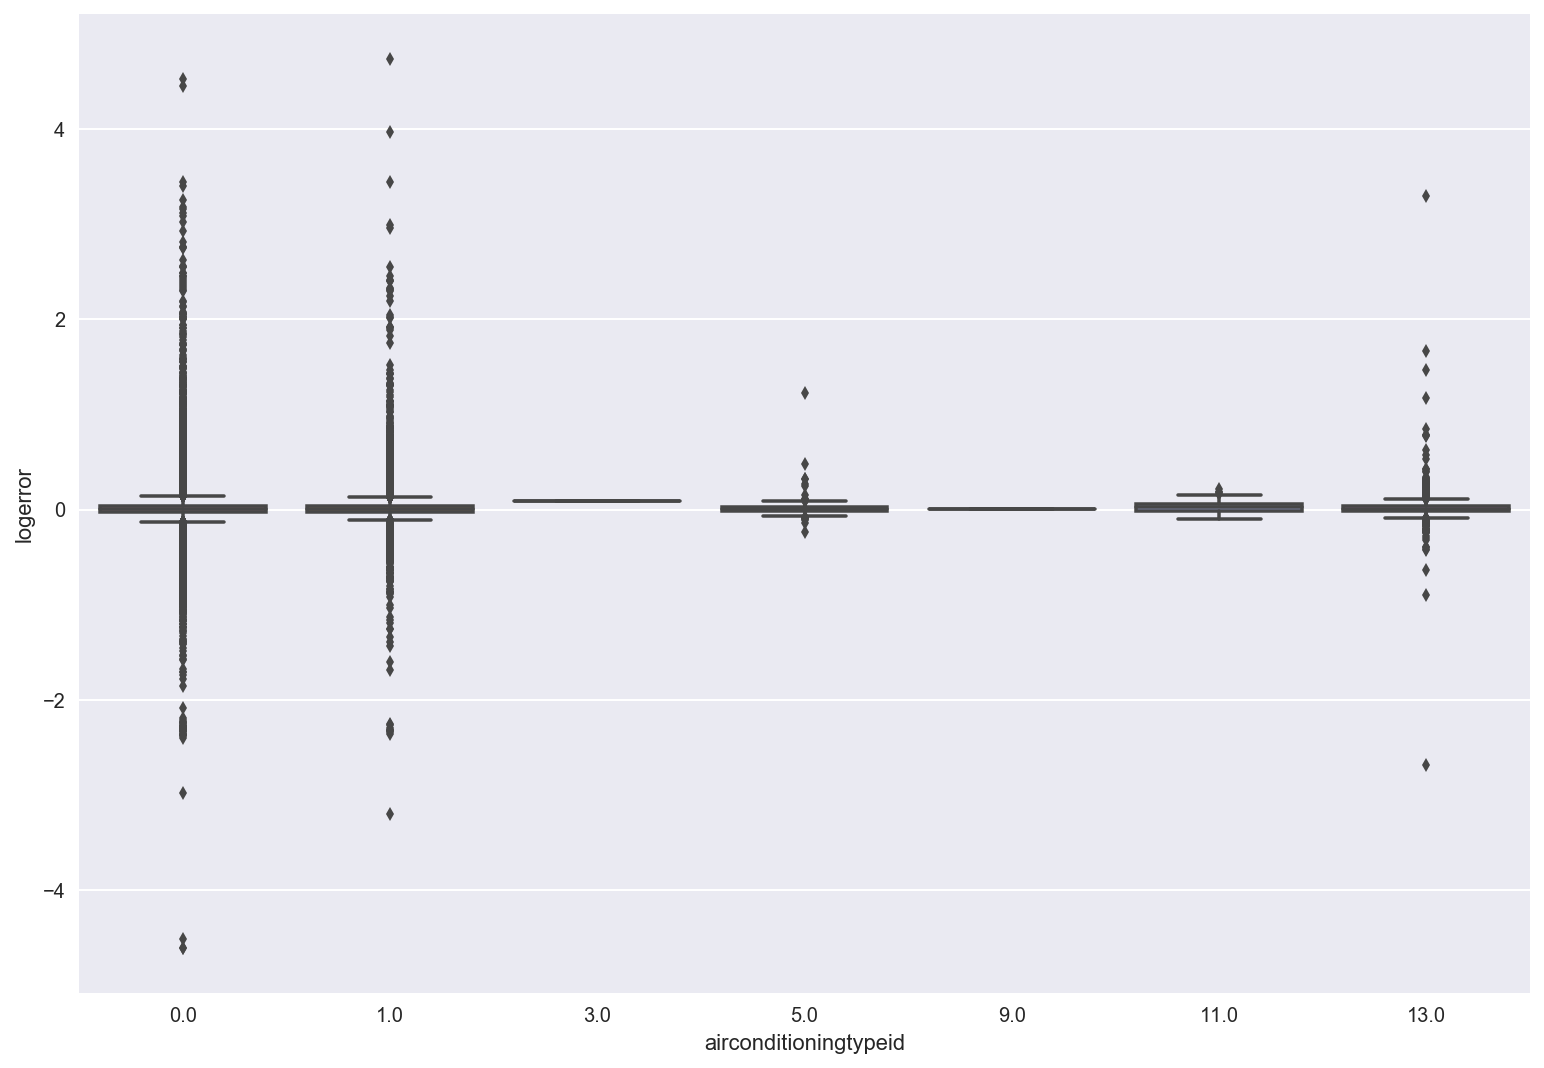

(90275,)


0    0
1    0
2    0
3    0
4    0
Name: airconditioningtypeid, dtype: int64

In [4]:
sns.set(rc={"figure.figsize": (13, 9)})
sns.boxplot(x="airconditioningtypeid", y="logerror", data=df_16.fillna(0)) #fillna를 하기 전에도 결과는 똑같다. 
plt.show() # 에어컨 타입 별로 차이를 해석 하기 힘들다. 차이가 보이는 부분은 데이터의 개수 차이 때문에 의미가 흐려져있다. 
#### 이 건 그냥 one hot으로 취급 하고, nan -> 0 
catecols = ["airconditioningtypeid"]

# Imputation!
df_16.airconditioningtypeid = [int(x) for x in df_16.airconditioningtypeid.fillna(0)]
print(df_16.airconditioningtypeid.shape)
df_16.airconditioningtypeid[:5]

#### architecturalstyletypeid

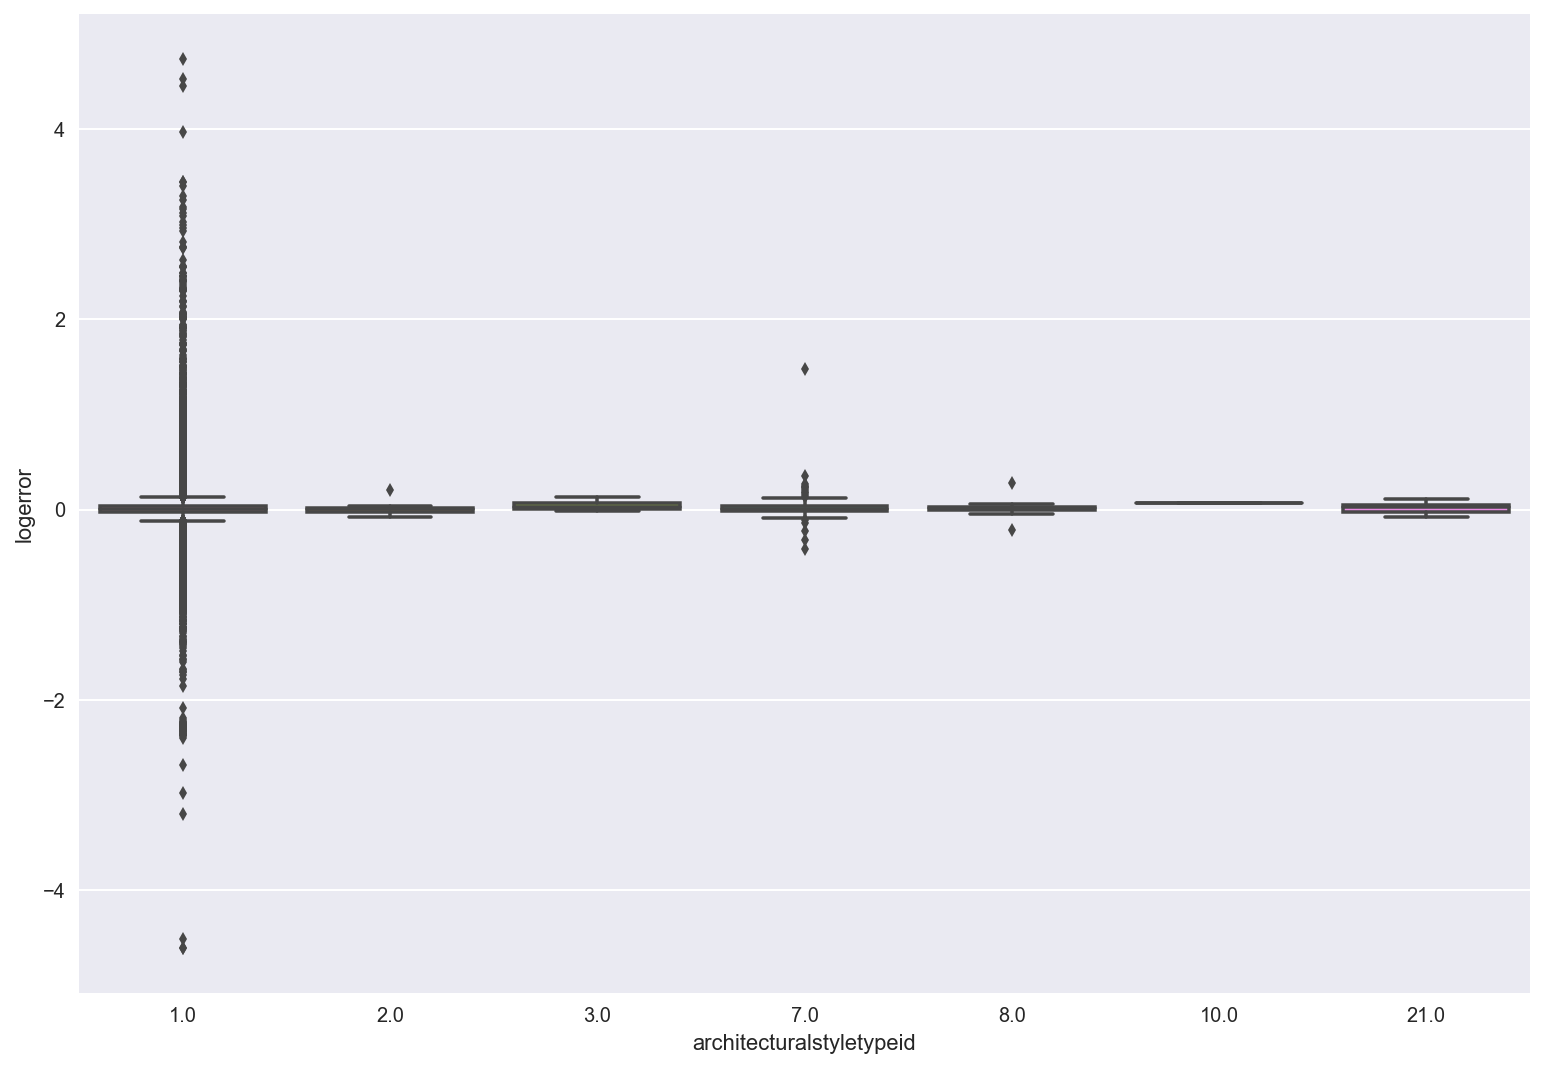

In [5]:
sns.set(rc={"figure.figsize": (13, 9)})
sns.boxplot(x="architecturalstyletypeid", y="logerror", data=df_16.fillna(1)) #fillna를 하기 전에도 결과는 똑같다. 
plt.show() # 에어컨 타입 별로 차이를 해석 하기 힘들다. 차이가 보이는 부분은 데이터의 개수 차이 때문에 의미가 흐려져있다. 
#### 이 건 그냥 one hot으로 취급 하고, nan -> 0 
# df_16.airconditioningtypeid = [int(x) for x in df_16.airconditioningtypeid.fillna(0)]
# print(df_16.airconditioningtypeid.shape)
# df_16.airconditioningtypeid[:5]



In [6]:
'architecturalstyletypeid'
ach_type_val, ach_type_counts = np.unique(df_16["architecturalstyletypeid"].fillna(1), return_counts=True)
print('architecturalstyletypeid')
pd.DataFrame(ach_type_counts, index=ach_type_val, columns=['count'])

architecturalstyletypeid


,count
1.0,90014
2.0,11
3.0,4
7.0,221
8.0,16
10.0,1
21.0,8


-  1.0  -
0.16118848531527757
-  2.0  -
0.0700146006024505
-  3.0  -
0.056112092056881994
-  7.0  -
0.12259377165012414
-  8.0  -
0.0927003183567214
-  10.0  -
0.0
-  21.0  -
0.05741125216366562


0    1
1    1
2    1
3    1
4    1
Name: architecturalstyletypeid, dtype: int64

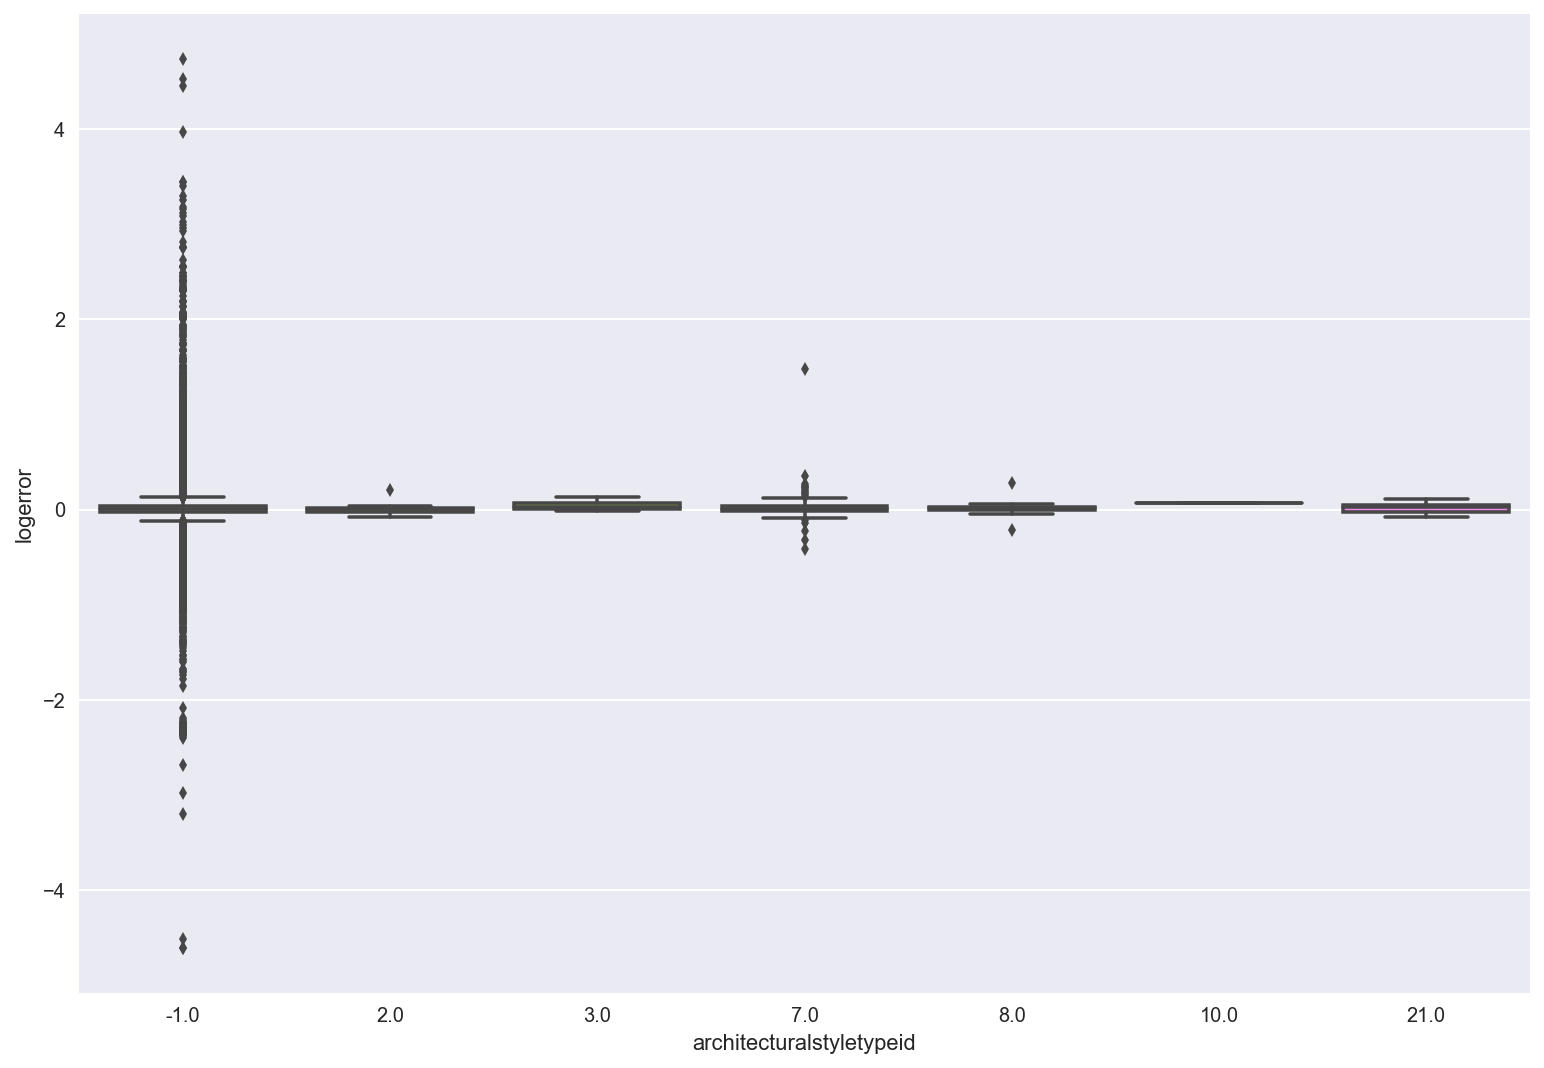

In [7]:
# 난 값이 대부분 이고 nan 값이면 로그에러의 분산이 커보인다. 
sns.boxplot(x="architecturalstyletypeid", y='logerror', data=df_16.fillna(-1, inplace=False))
# 실제 수치적으로는 아래와 같다. 모표준편차 추정값
for t in ach_type_val:
    arc_type_t_std = []
    print("- ", t, " -")
    if t == 1:
        print(np.std(df_16.fillna(1, inplace=False)[df_16.architecturalstyletypeid.isna()].logerror))
        continue
    print(np.std(df_16.fillna(1, inplace=False)[df_16.architecturalstyletypeid == t].logerror))
    
## 이 것 역시 onehot그냥 원핫으로 -1로 nan imputation 
catecols.append("architecturalstyletypeid")

## Imputation
df_16.architecturalstyletypeid = [int(x) for x in df_16.architecturalstyletypeid.fillna(1)]
df_16.architecturalstyletypeid[:5]

#### basementsqft

,Finished living area below or partially below ground level


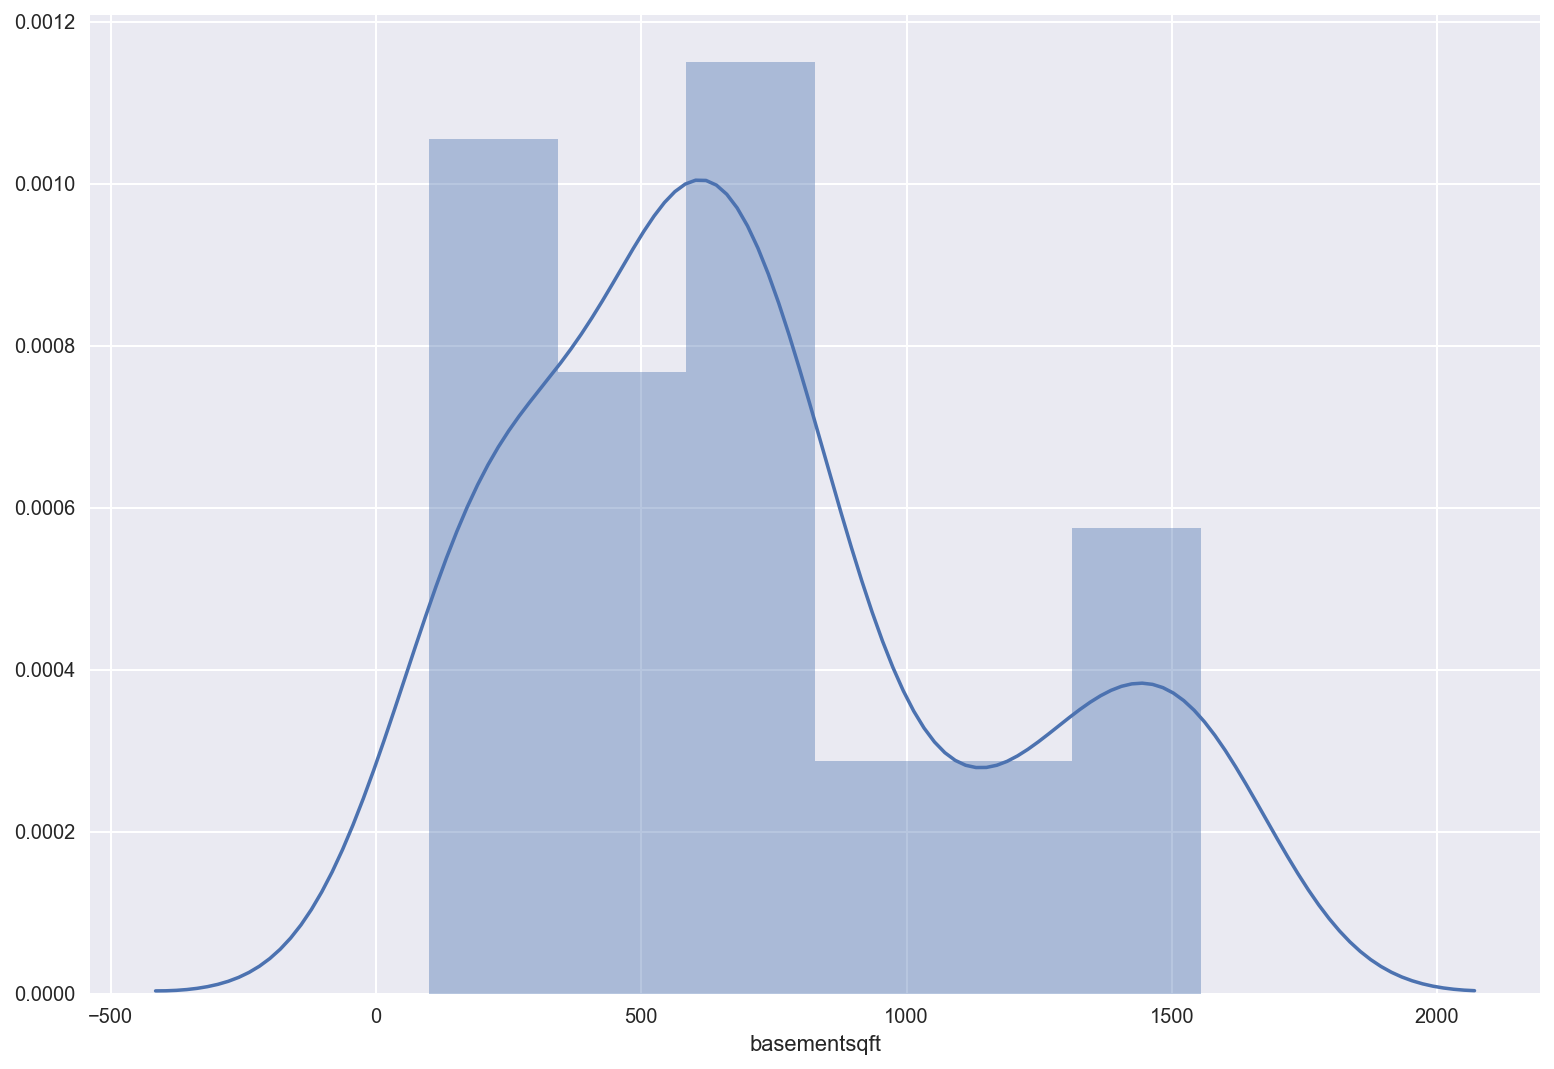

In [8]:
### basementsqft -> ,Finished living area below or partially below ground level
#### -> 있을 때만, 측정 되었을 것이다. 
print(data_dict["basementsqft"])

# np.min(df_16.basementsqft) == 100.0 
# 그냥 숫자로 넣기 보다, 평균 이동을 하고 nan값을 
sns.distplot(df_16.basementsqft.dropna())

In [9]:
df_16.basementsqft.dropna().shape # 43 개의 값만 있다.
# nan을 0으로 넣고, loggerror와의 상관계수와scatter를 그려 보자 

(43,)

cor,   p-value
(0.009019339896495443, 0.006729329677202943)
spearman
SpearmanrResult(correlation=0.008510443935220246, pvalue=0.010556655551209129)


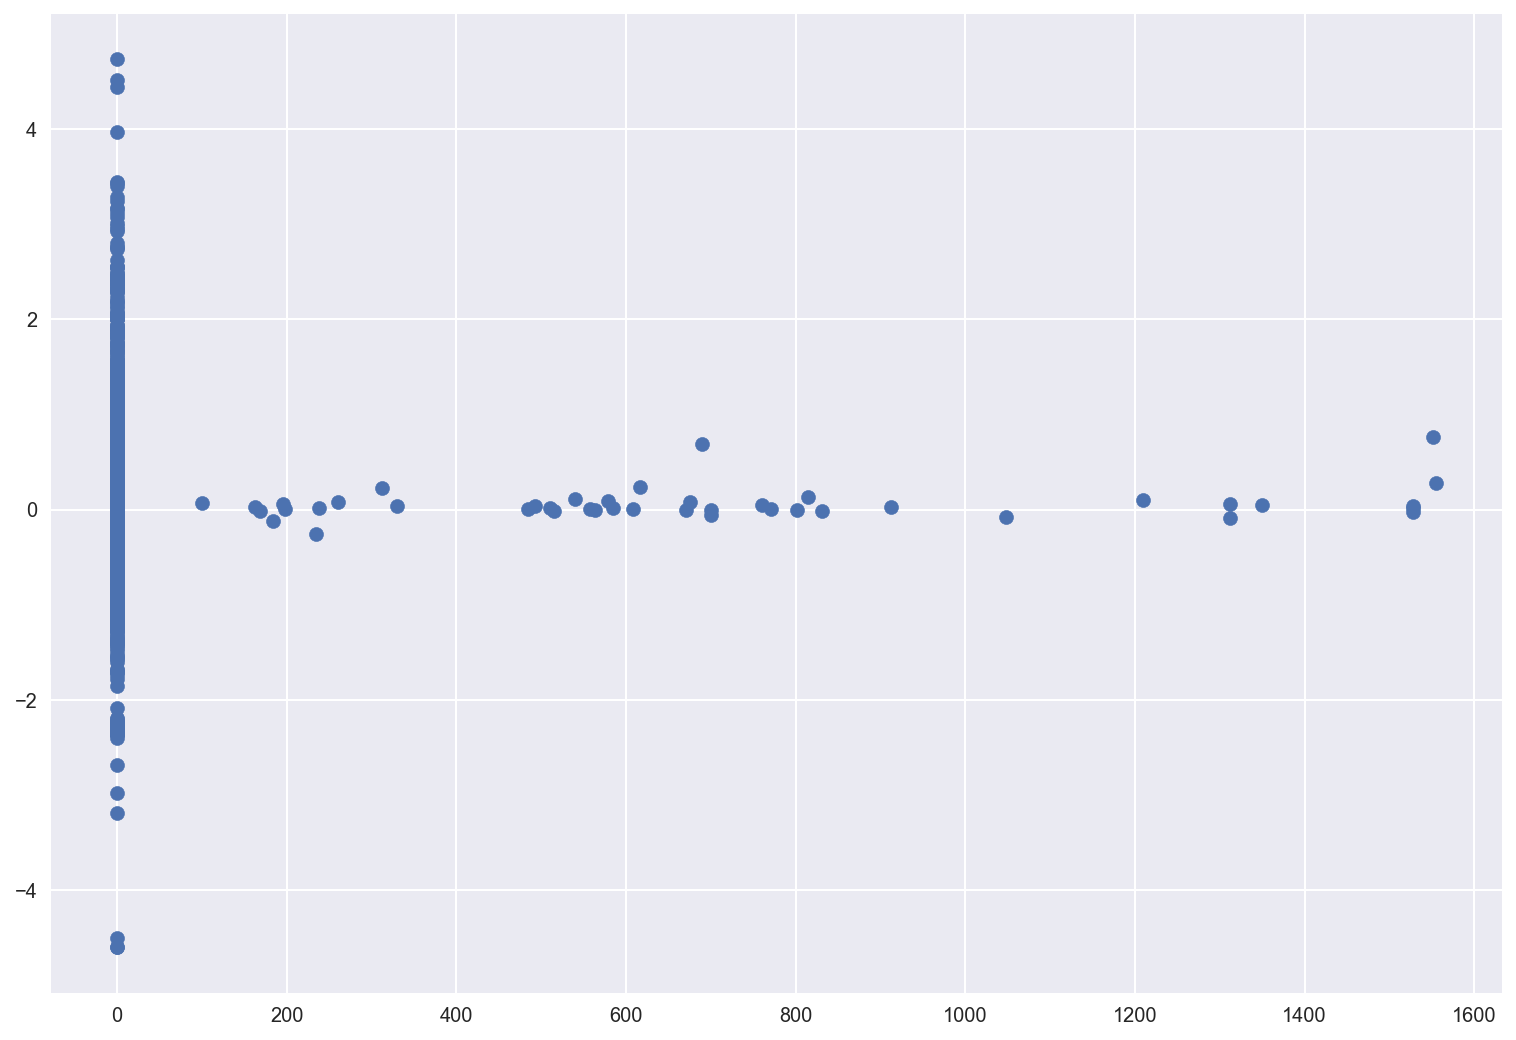

In [33]:
# 뚜렸한 관계가 안보인다. -> 그냥 있냐 없냐 정도로 처리 해도 괜찮을 듯 `
# correlation 선형! 
print("cor,   p-value" )
print(sp.stats.pearsonr(df_16.basementsqft.fillna(0), df_16.logerror))
print('spearman')
print(sp.stats.spearmanr(df_16.basementsqft.fillna(0), df_16.logerror))
plt.scatter(df_16.basementsqft.fillna(0), df_16.logerror) 
#Target과의 상관관계가 없다. nan 값은 그냥 0과 min값보다 작은 99 두가지를 시도 해보겠다. 
df_16.basementsqft = df_16.basementsqft.fillna(0)
numecols = ["basementsqft"]

#### bathroomcnt

,Number of bathrooms in home including fractional bathrooms


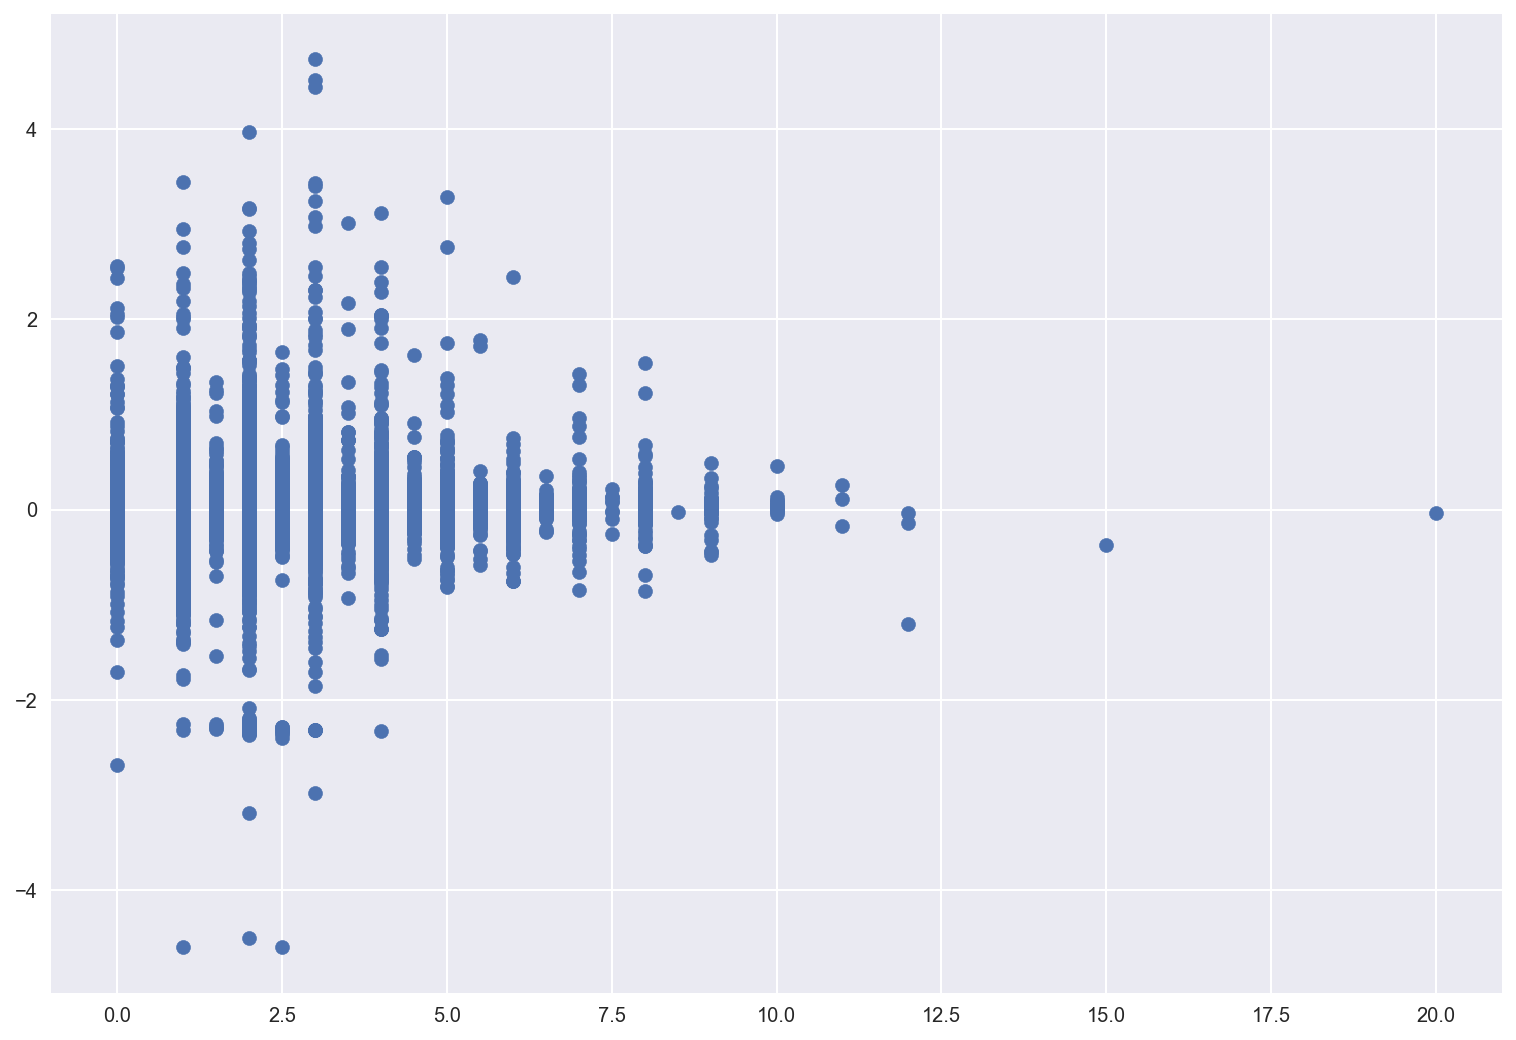

In [11]:
print(data_dict["bathroomcnt"])
# plt.figure()
# sns.distplot(df_16.bathroomcnt)
plt.figure()
plt.scatter(df_16.bathroomcnt, df_16.logerror)

#  아무 처리 안함 

In [38]:
numecols.append("bathroomcnt")
df_16.bathroomcnt[df_16.bathroomcnt > 10.0] 
# 화장실이 10개 이상인것은 8개 밖에 없다. 나중에 모델에서 영향이 크면 빼거나, 몇개로 범주화해서 처리 하겠다. 

9678     12.0
13285    11.0
42935    12.0
49230    20.0
53272    11.0
55103    11.0
69157    12.0
87193    15.0
Name: bathroomcnt, dtype: float64

#### bedroomcnt

In [13]:
print(data_dict["bedroomcnt"])

,Number of bedrooms in home


/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/scipy/stats/morestats.py:2183: RuntimeWarning: divide by zero encountered in double_scalars
  Xsq = np.sum(Ni * (asarray(Aibar) - anbar)**2.0, axis=0) / varsq


2.0 3.0


/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/scipy/stats/morestats.py:2183: RuntimeWarning: invalid value encountered in double_scalars
  Xsq = np.sum(Ni * (asarray(Aibar) - anbar)**2.0, axis=0) / varsq


12.0 13.0


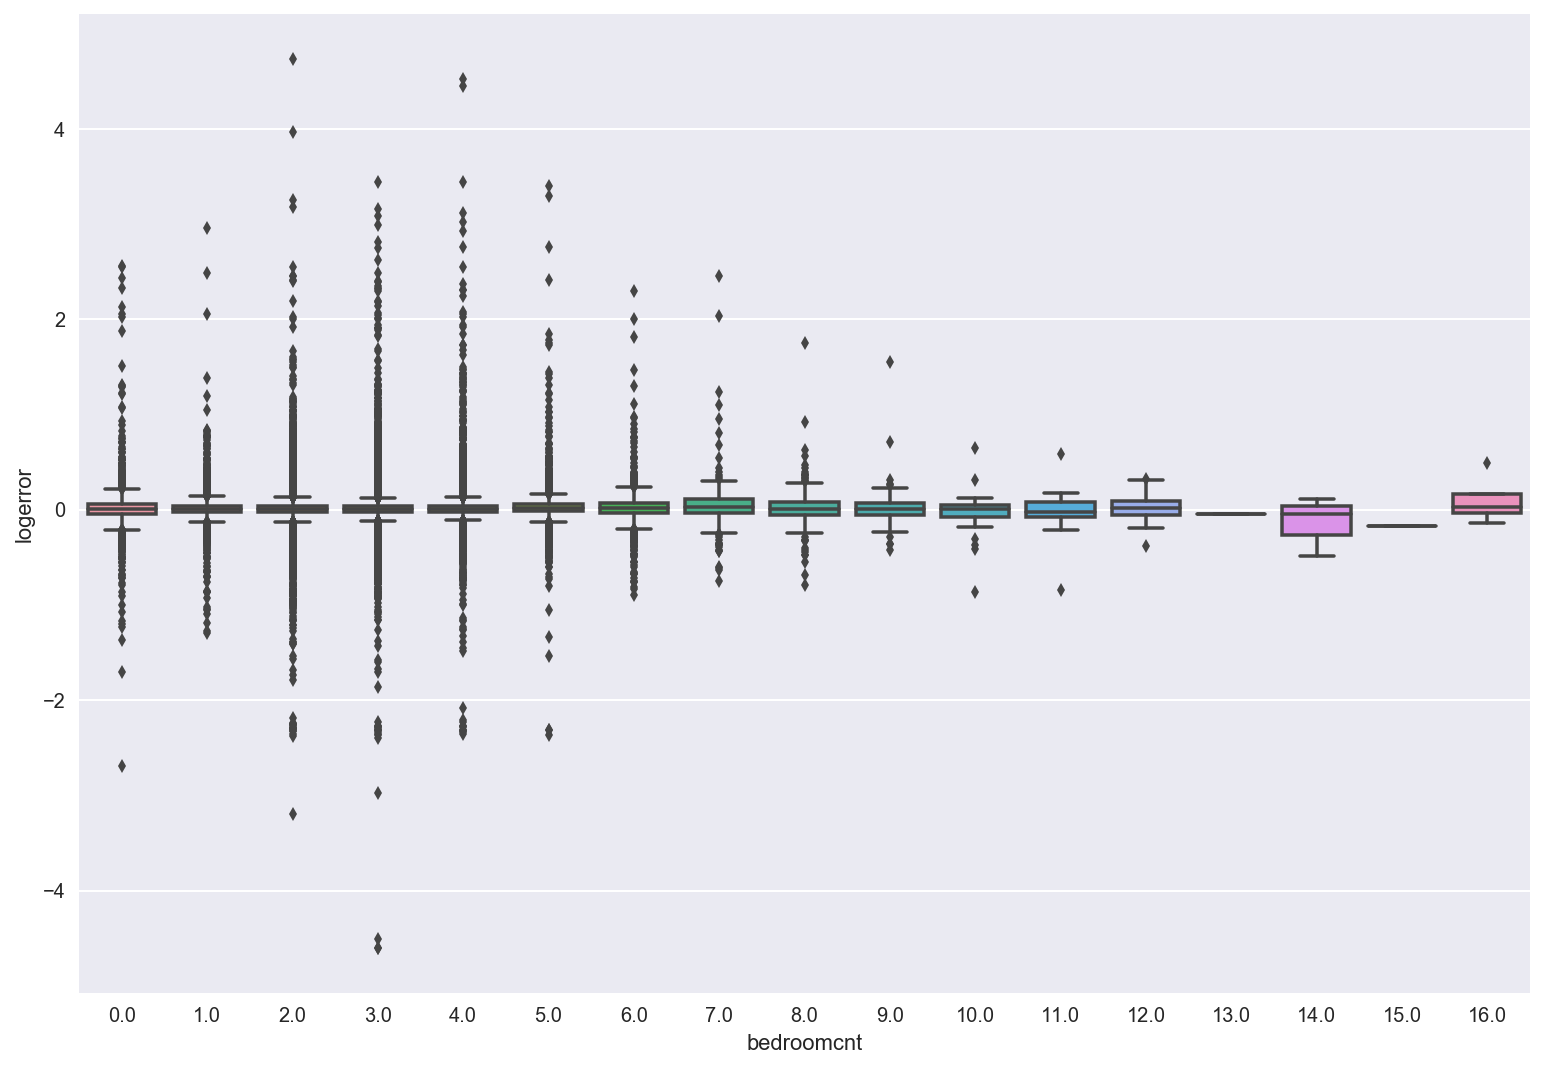

In [14]:
# plt.scatter(df_16.bedroomcnt, df_16.logerror)
sns.boxplot(df_16.bedroomcnt, df_16.logerror)  # 분산 값에는 차이가 있어보이기도 한다. 
# 등분산 검정 
bedroom_val, bedroom_counts = np.unique(df_16.bedroomcnt, return_counts=True)
for i, j in zip(bedroom_val[:-1], bedroom_val[1:]):
    if sp.stats.fligner(df_16.bedroomcnt[df_16.bedroomcnt == i], df_16.bedroomcnt[df_16.bedroomcnt == j])[1] > 0.005:
        print(i, j)
        
        
# 2, 3 과 12, 13은 로그에러의 분산이 같다고 볼 수 있겠다. (유의 수준 1 %)

In [17]:
len(np.unique(df_16.bedroomcnt)) ## 17개 category or 17개의 정수 값

17

4
0.9238548878427029
4.0


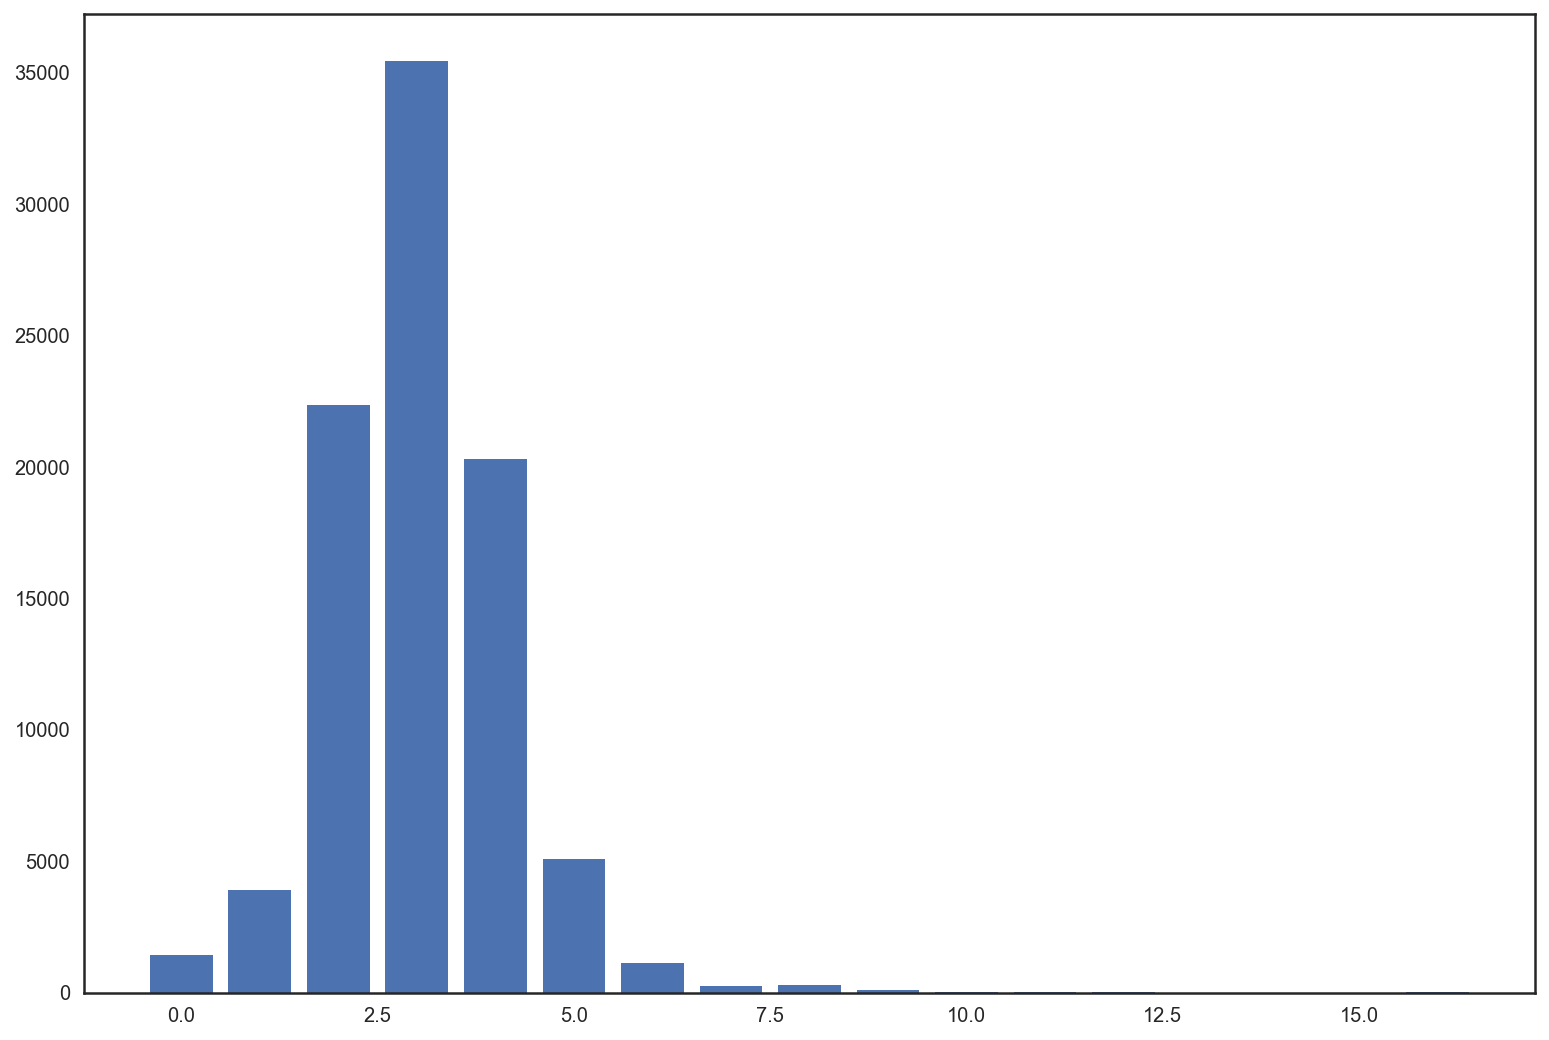

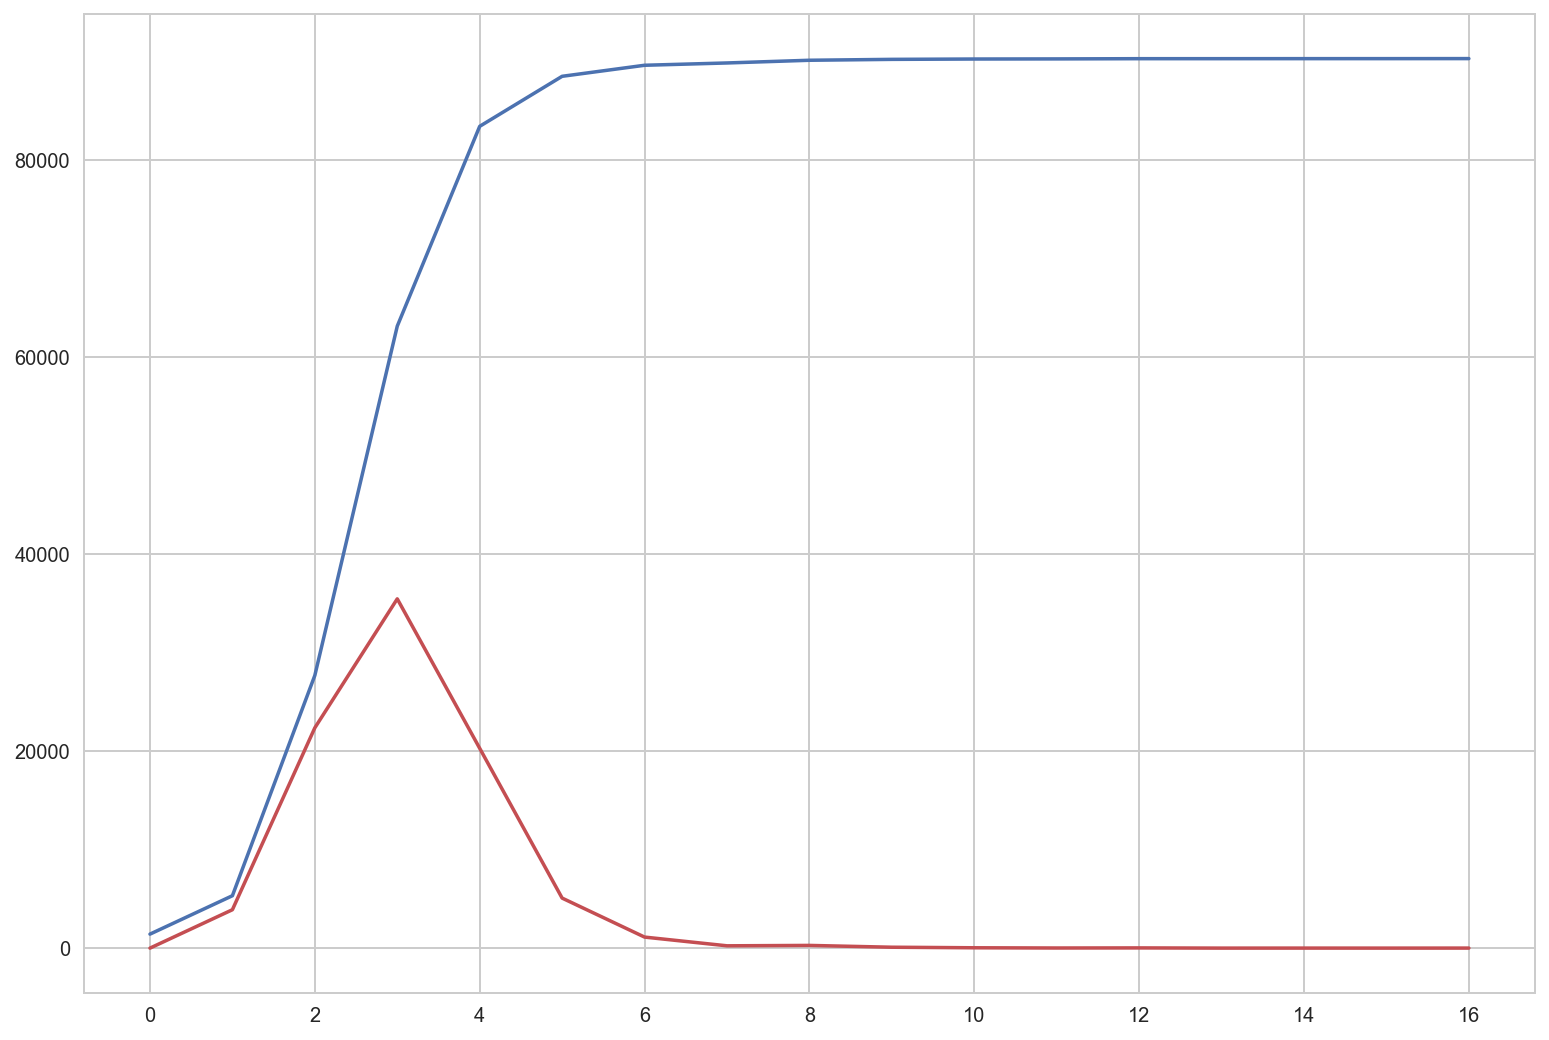

In [34]:
sns.set_style("white")
plt.bar(x=bedroom_val, height=bedroom_counts)

# sns.countplot(x=bedroom_val y=bedroom_counts)
plt.figure()
sns.set_style("whitegrid")
plt.plot(bedroom_val, np.cumsum(bedroom_counts))

for i, nu in enumerate(np.cumsum(bedroom_counts)):
    
    if nu/sum(bedroom_counts) >= 0.8:
        print(i)
        print(nu/sum(bedroom_counts))
        print(bedroom_val[i])
        break
        
## 위 cdf의 pdf 
pdf_points = [0]
for nu1, nu2 in zip(np.cumsum(bedroom_counts)[:-1], np.cumsum(bedroom_counts)[1:]):
    pdf_points.append((nu2 - nu1))
plt.plot(bedroom_val, pdf_points, c='r')

# numerical data appending 
numecols.append('bedroomcnt')

#### buildingclasstypeid

In [25]:
df_16.buildingclasstypeid.dropna()

# typeid == 4 -> 1  or not -> 0
df_16.buildingclasstypeid = np.array([1 if x == 4.0 else 0 for x in df_16.buildingclasstypeid.fillna(0)])
df_16.buildingclasstypeid.tail()

90270    0
90271    0
90272    0
90273    0
90274    0
Name: buildingclasstypeid, dtype: int64

In [35]:
numecols.append("buildingclasstypeid")

#### buildingqualitytypeid

In [32]:
len(np.unique(df_16.buildingqualitytypeid.dropna())) ## -> 8개 종류

8

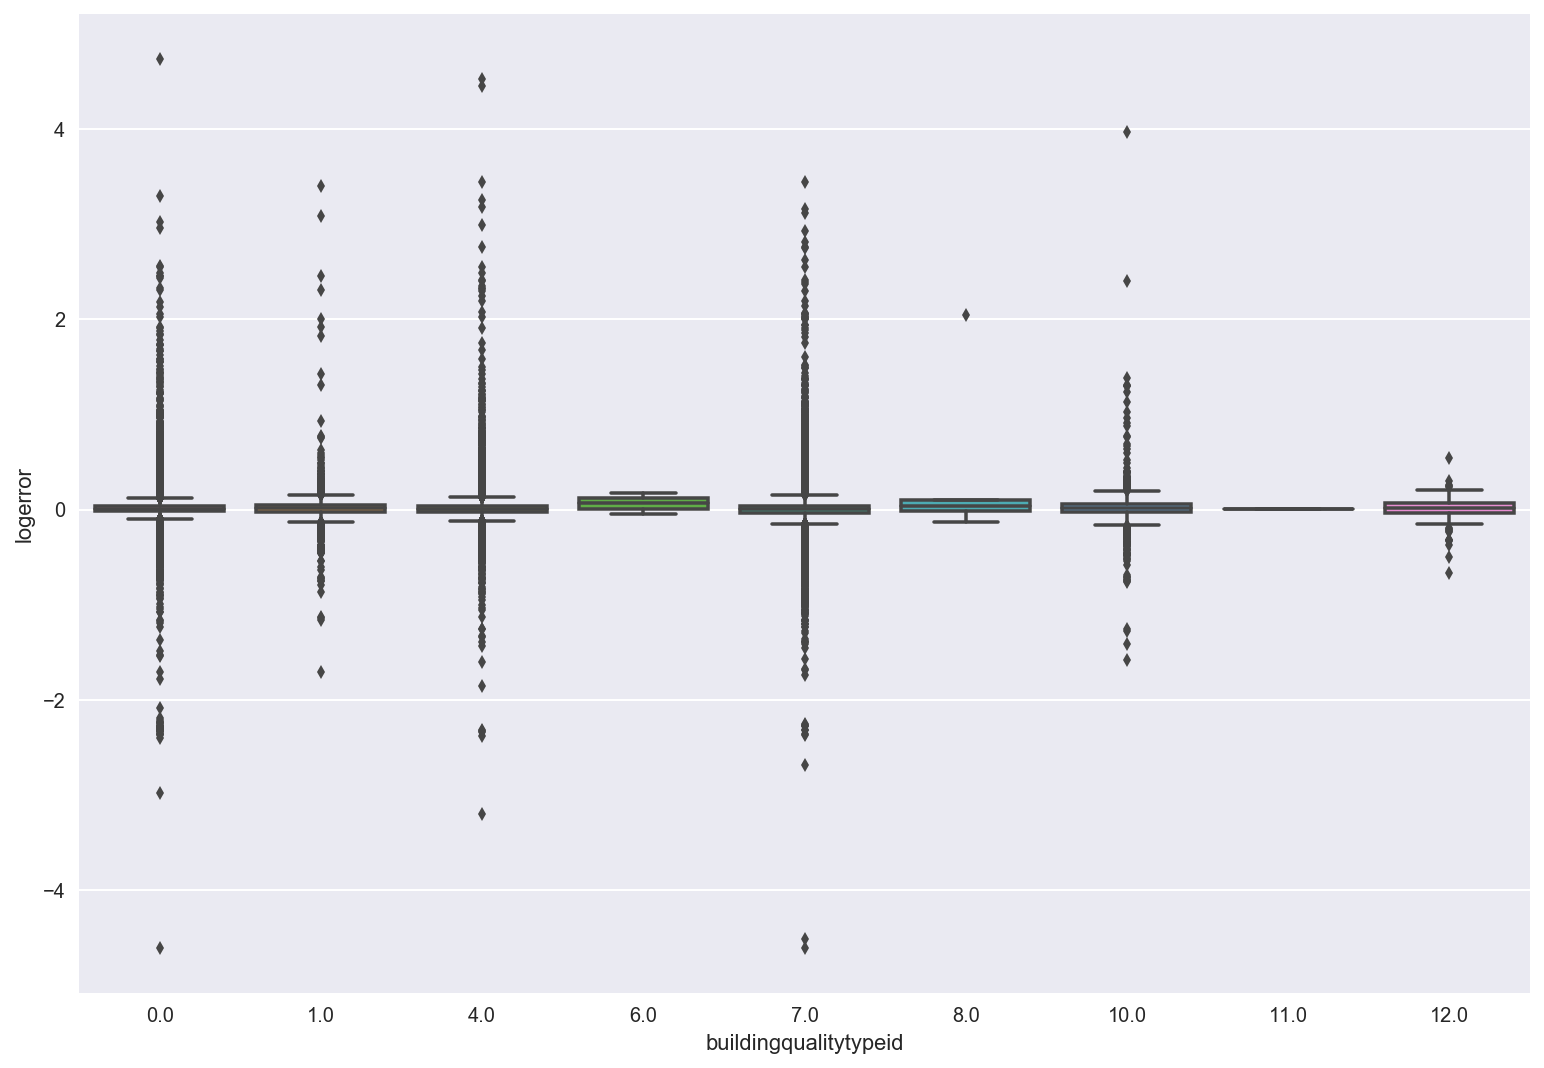

In [30]:
sns.boxplot(x=df_16.buildingqualitytypeid.fillna(0), y=df_16.logerror)

In [36]:
# nan값 ->  0 and categorical 
df_16.buildingqualitytypeid.fillna(0, inplace=True)
catecols.append("buildingqualitytypeid")

#### calculatedbathnbr

(0, 20)

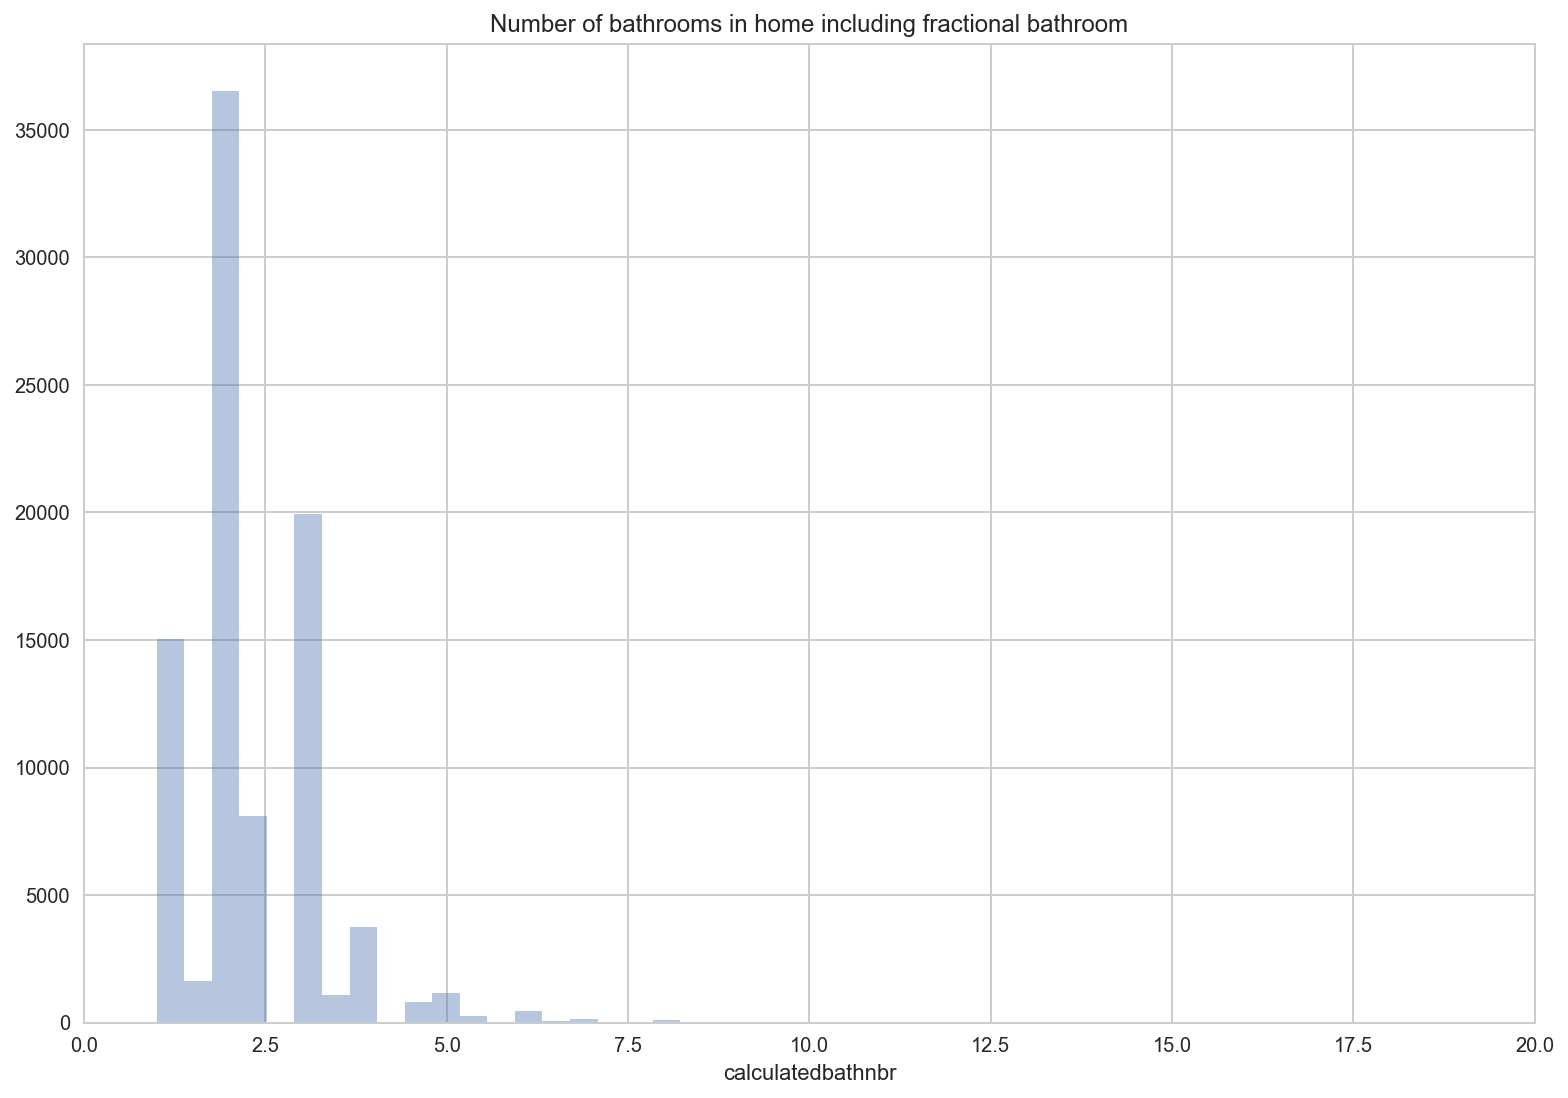

In [54]:
plt.title(data_dict["calculatedbathnbr"][1:])
sns.distplot(df_16.calculatedbathnbr.dropna(), kde=False)
plt.xlim(0, 20)

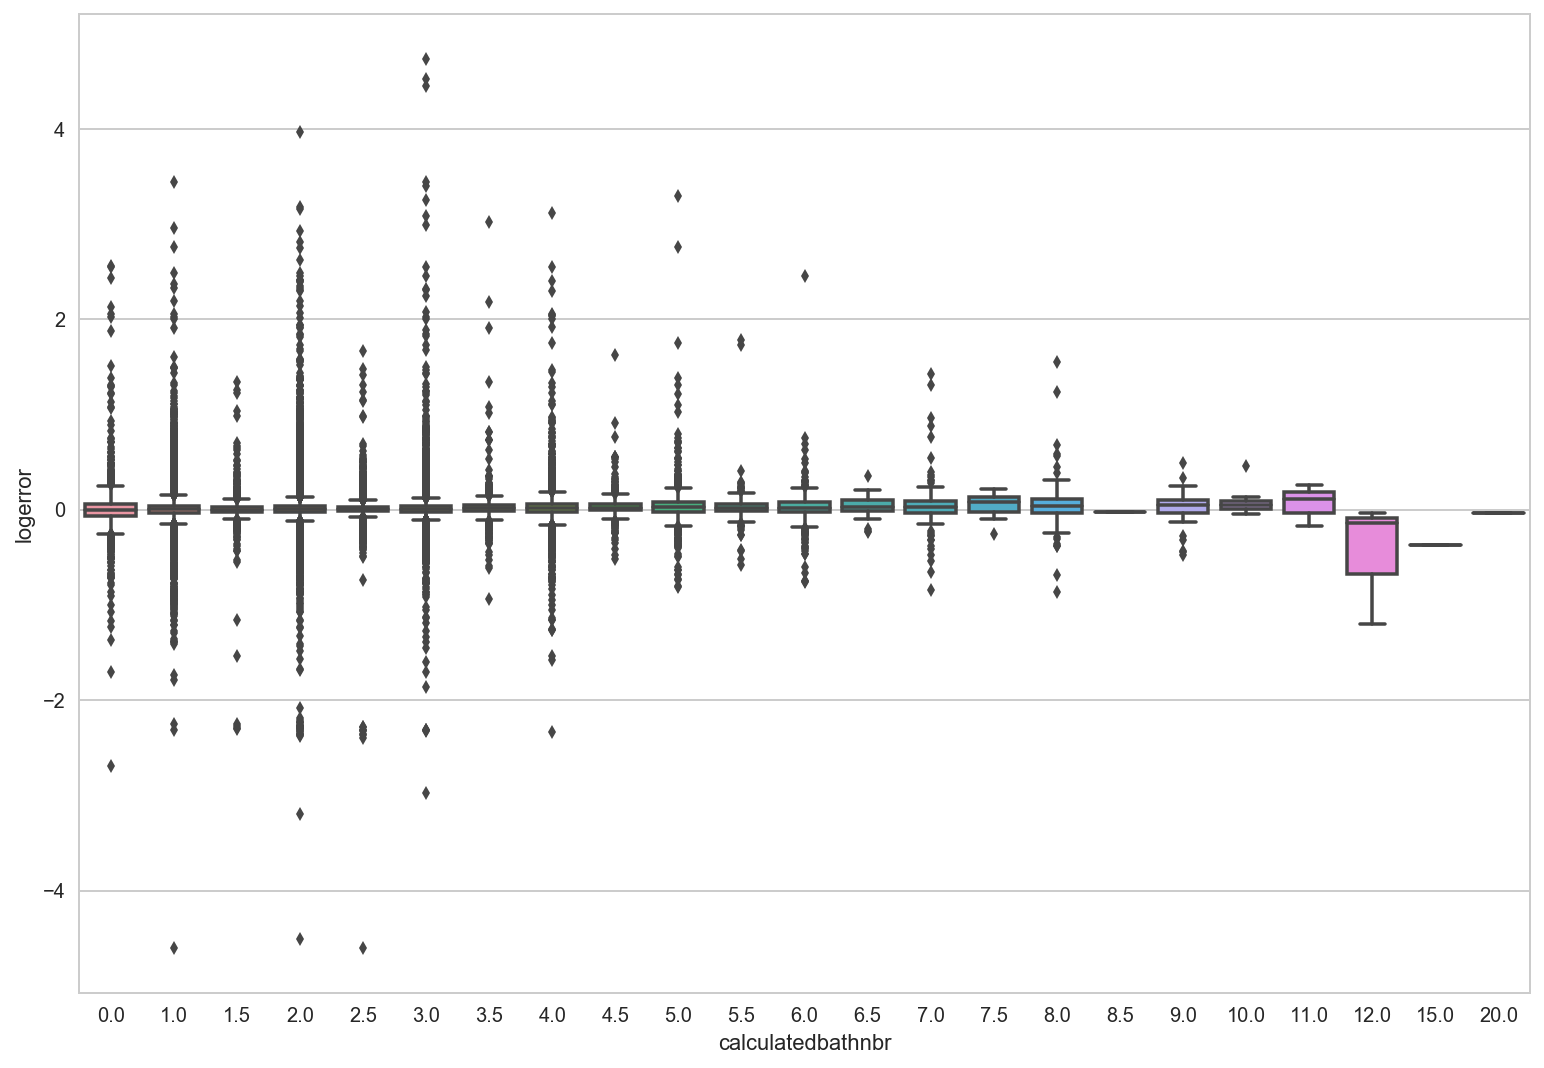

In [55]:
sns.boxplot(df_16.calculatedbathnbr.fillna(0), df_16.logerror)

In [56]:
# integervalues - fillna(0)
df_16.calculatedbathnbr.fillna(0, inplace=True)
numecols.append("calculatedbathnbr")

#### decktypeid

In [65]:
## 66 -> 1, nan -> 0
df_16.decktypeid = np.array([1 if x == 66.0 else 0 for x in df_16.decktypeid.fillna(0)])
numecols.append("decktypeid")

#### finishedfloor1squarefeet

,Size of the finished living area on the first (entry) floor of the home


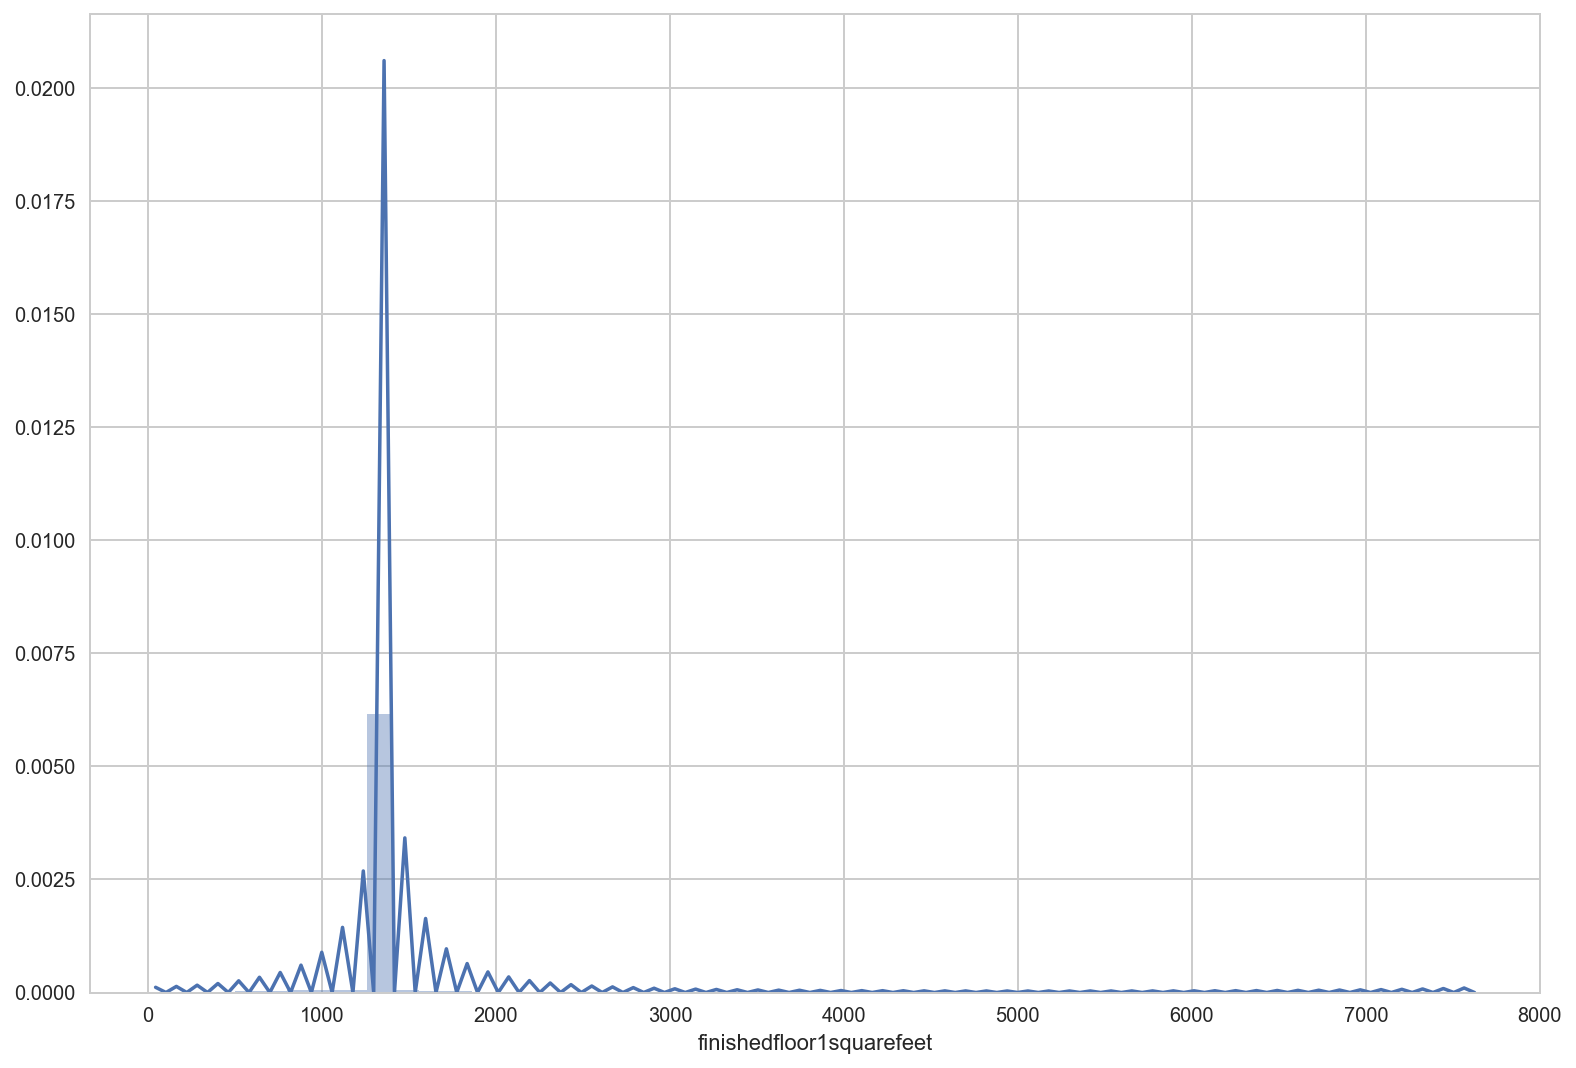

In [89]:
print(data_dict['finishedfloor1squarefeet'])
sns.distplot(df_16.finishedfloor1squarefeet.dropna())

In [77]:
df_16.finishedfloor1squarefeet.fillna(df_16.finishedfloor1squarefeet.mean(), inplace=True)
numecols.append("finishedfloor1squarefeet")

#### calculatedfinishedsquarefeet

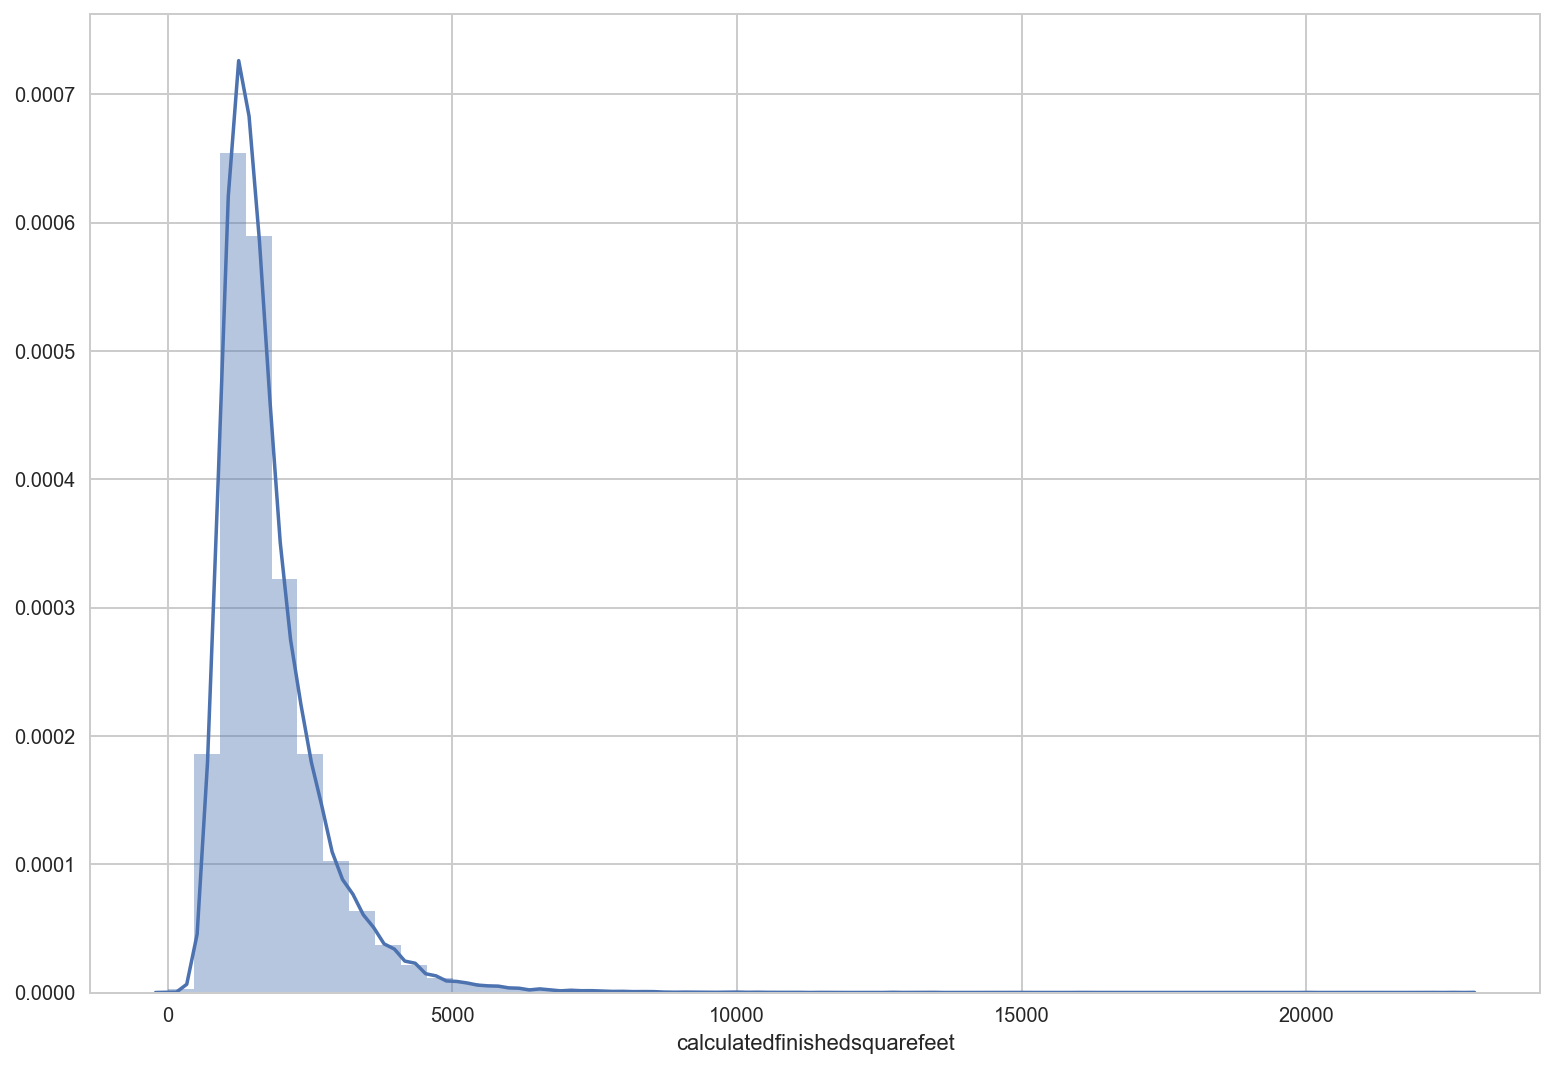

In [90]:
data_dict["calculatedfinishedsquarefeet"]
sns.distplot(df_16.calculatedfinishedsquarefeet.dropna())

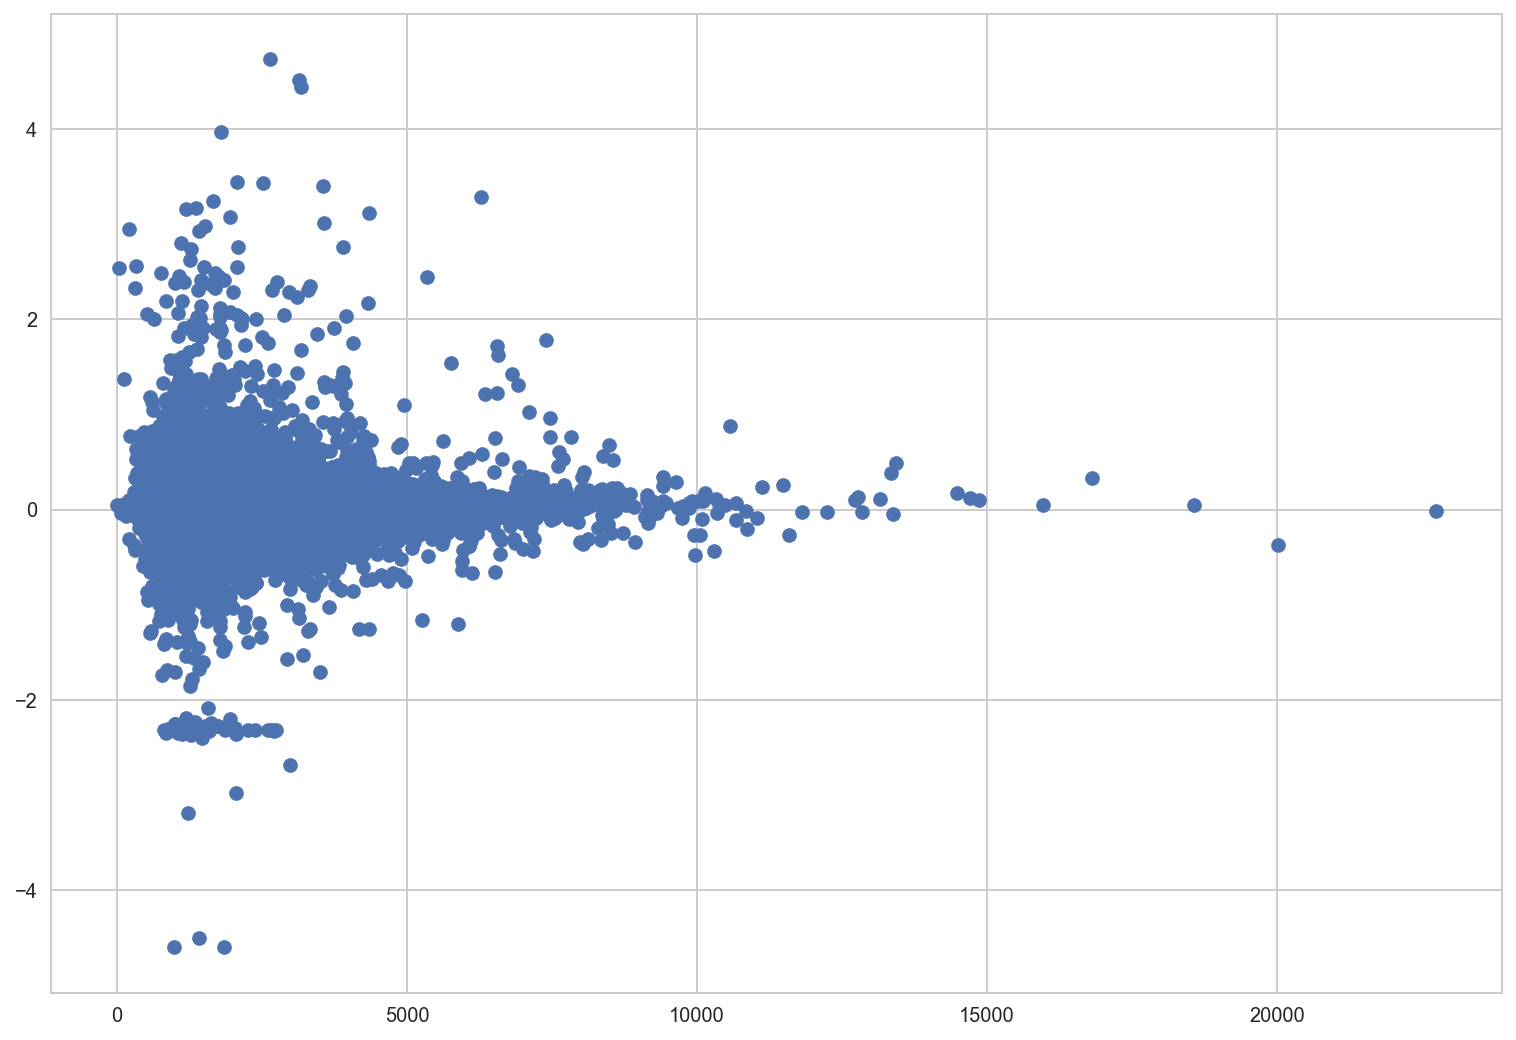

In [92]:
plt.scatter(df_16.calculatedfinishedsquarefeet.fillna(df_16.calculatedfinishedsquarefeet.mean()), df_16.logerror)

In [93]:
df_16.calculatedfinishedsquarefeet.fillna(df_16.calculatedfinishedsquarefeet.mean(), inplace=True)
numecols.append("calculatedfinishedsquarefeet")

#### finishedsquarefeet12

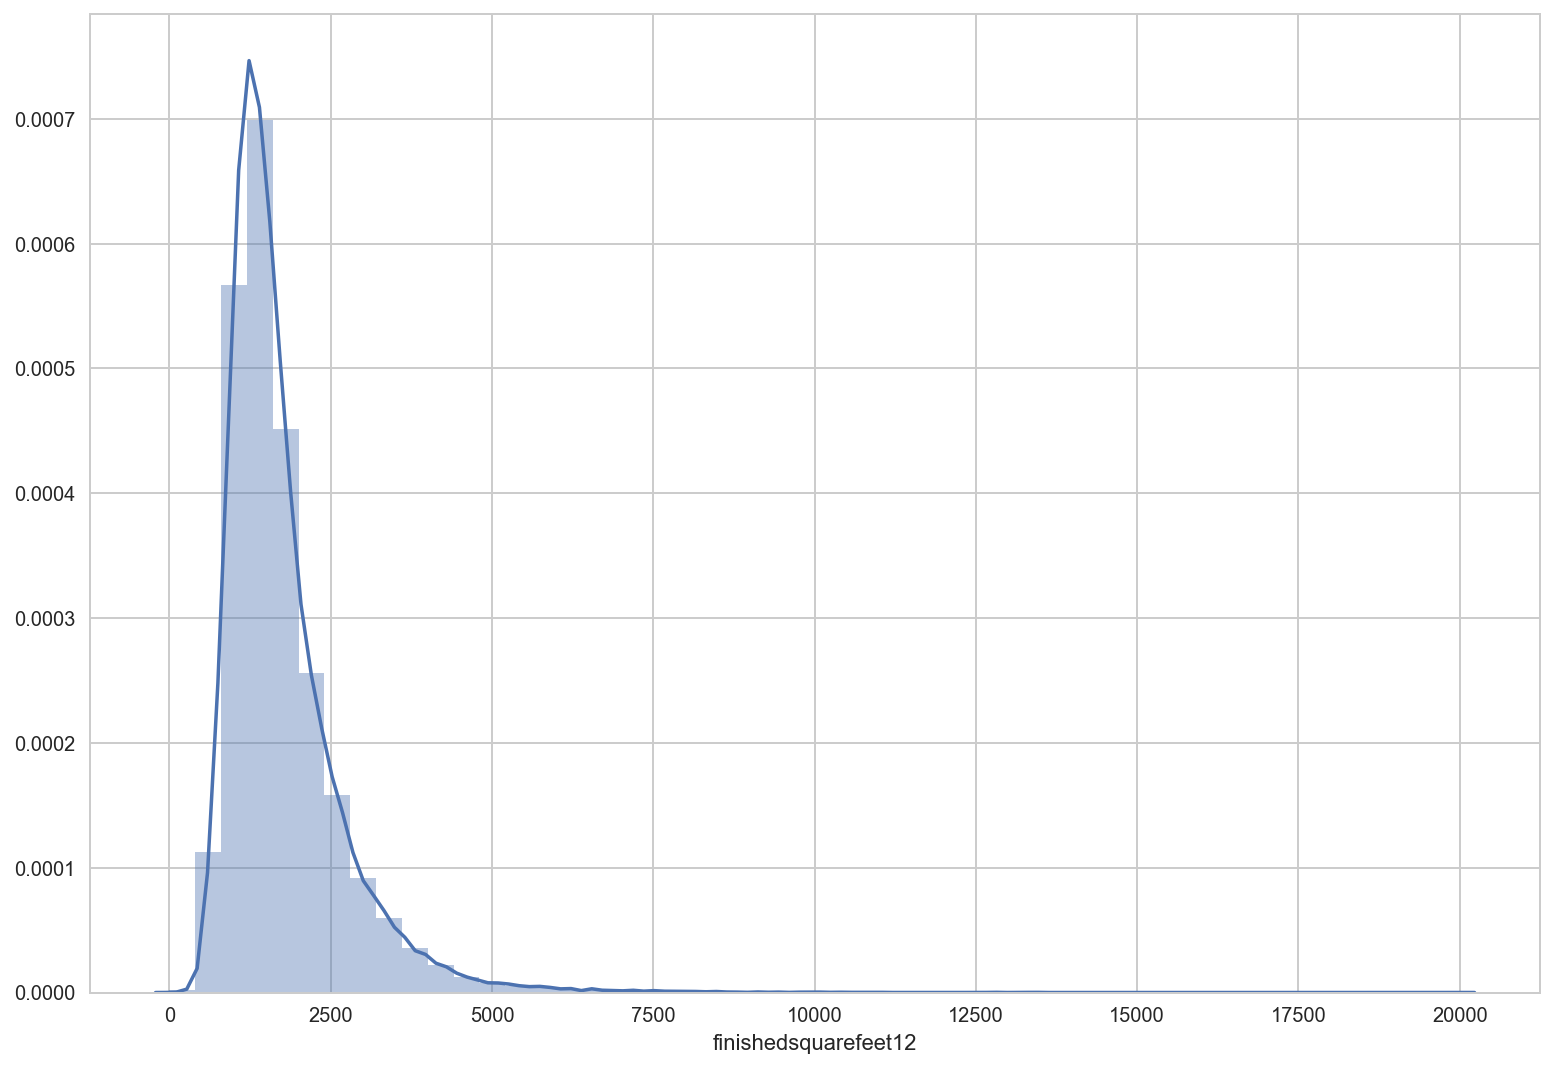

In [96]:
sns.distplot(df_16.finishedsquarefeet12.dropna())

In [99]:
df_16.finishedsquarefeet12.fillna(df_16.finishedsquarefeet12.mode(), inplace=True)
numecols.append("finishedsquarefeet12")

#### finishedsquarefeet13

In [106]:
print(data_dict["finishedsquarefeet13"])
df_16.finishedsquarefeet13.dropna()

,Perimeter living area


1812     1440.0
4031     1416.0
5401     1344.0
10868    1440.0
11769    1440.0
17204    1536.0
18547    1440.0
22534    1440.0
22540    1584.0
24285    1440.0
24753    1344.0
30643    1440.0
31093    1440.0
31535    1440.0
34253    1056.0
34710    1440.0
40539    1566.0
44634    1440.0
47414    1248.0
51825    1344.0
54078    1536.0
56304    1464.0
61666    1440.0
65283    1440.0
65284    1248.0
65725    1152.0
79341    1440.0
79826    1248.0
80271    1392.0
80731    1440.0
83498    1392.0
87525    1440.0
87987    1440.0
Name: finishedsquarefeet13, dtype: float64

In [108]:
sp.stats.pearsonr(df_16.finishedsquarefeet12.fillna(0), df_16.finishedsquarefeet13.fillna(0))

(-0.03263615999017426, 1.0372999042479685e-22)

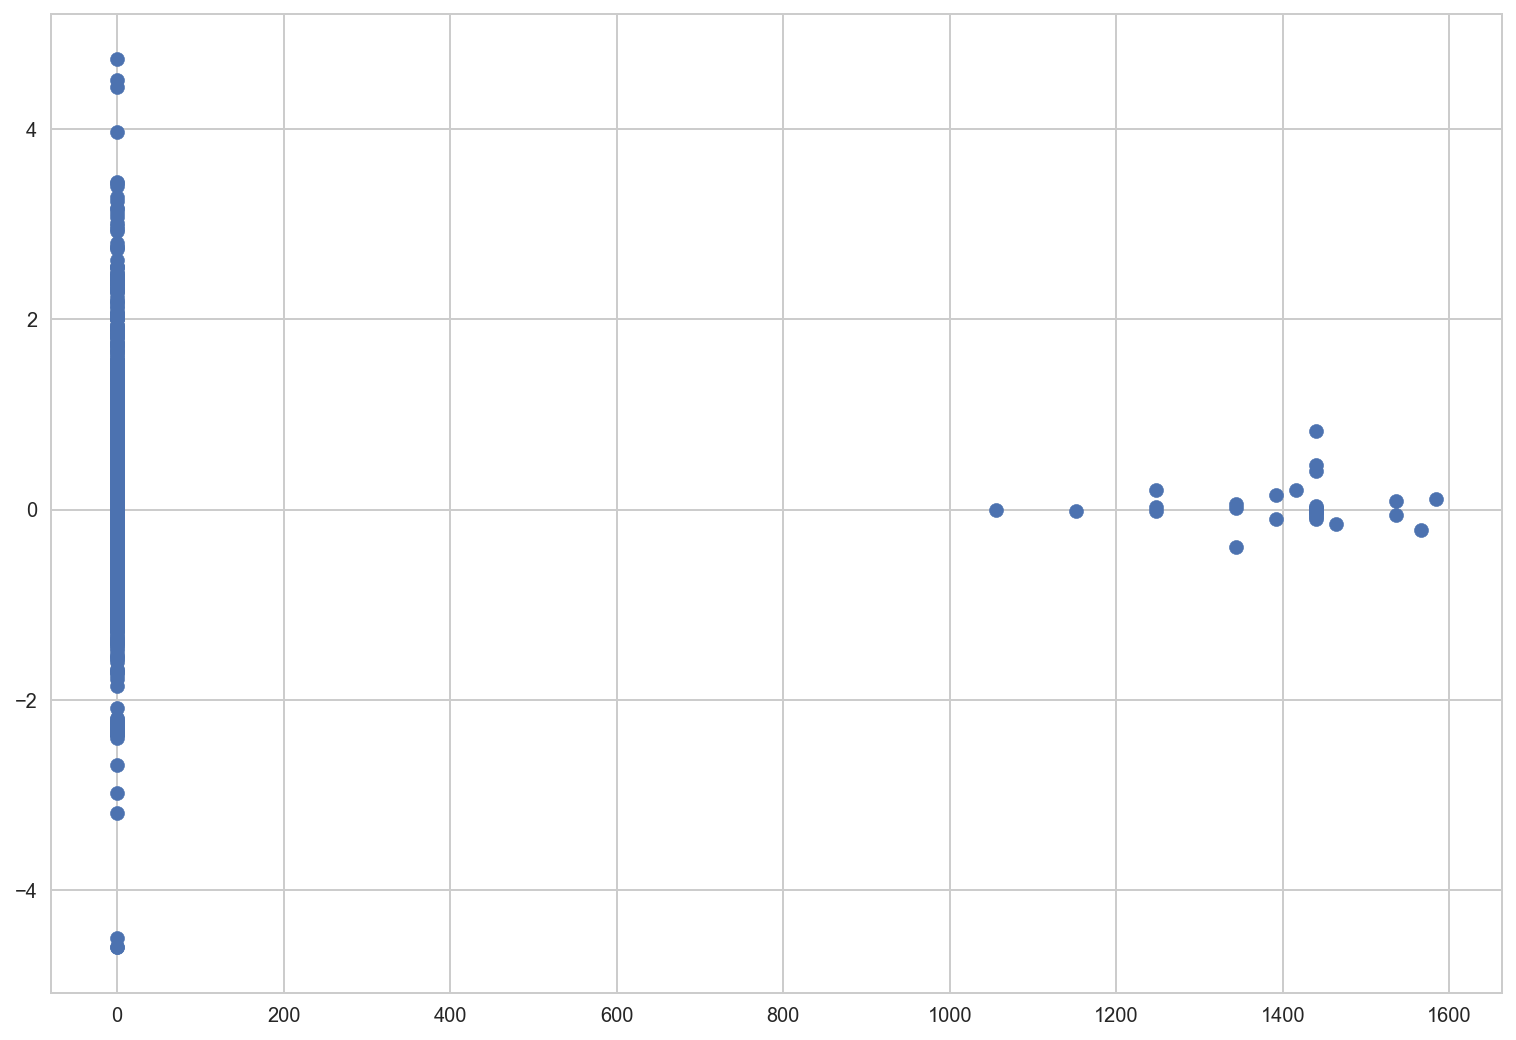

In [110]:
plt.scatter(df_16.finishedsquarefeet13.fillna(0), df_16.logerror)

In [111]:
# 평균 갑으로 채워두자 
df_16.finishedsquarefeet13.fillna(df_16.finishedsquarefeet13.mean(), inplace=True)
numecols.append("finishedsquarefeet13") ## will be scaled 

#### finishedsquarefeet15

,Total area


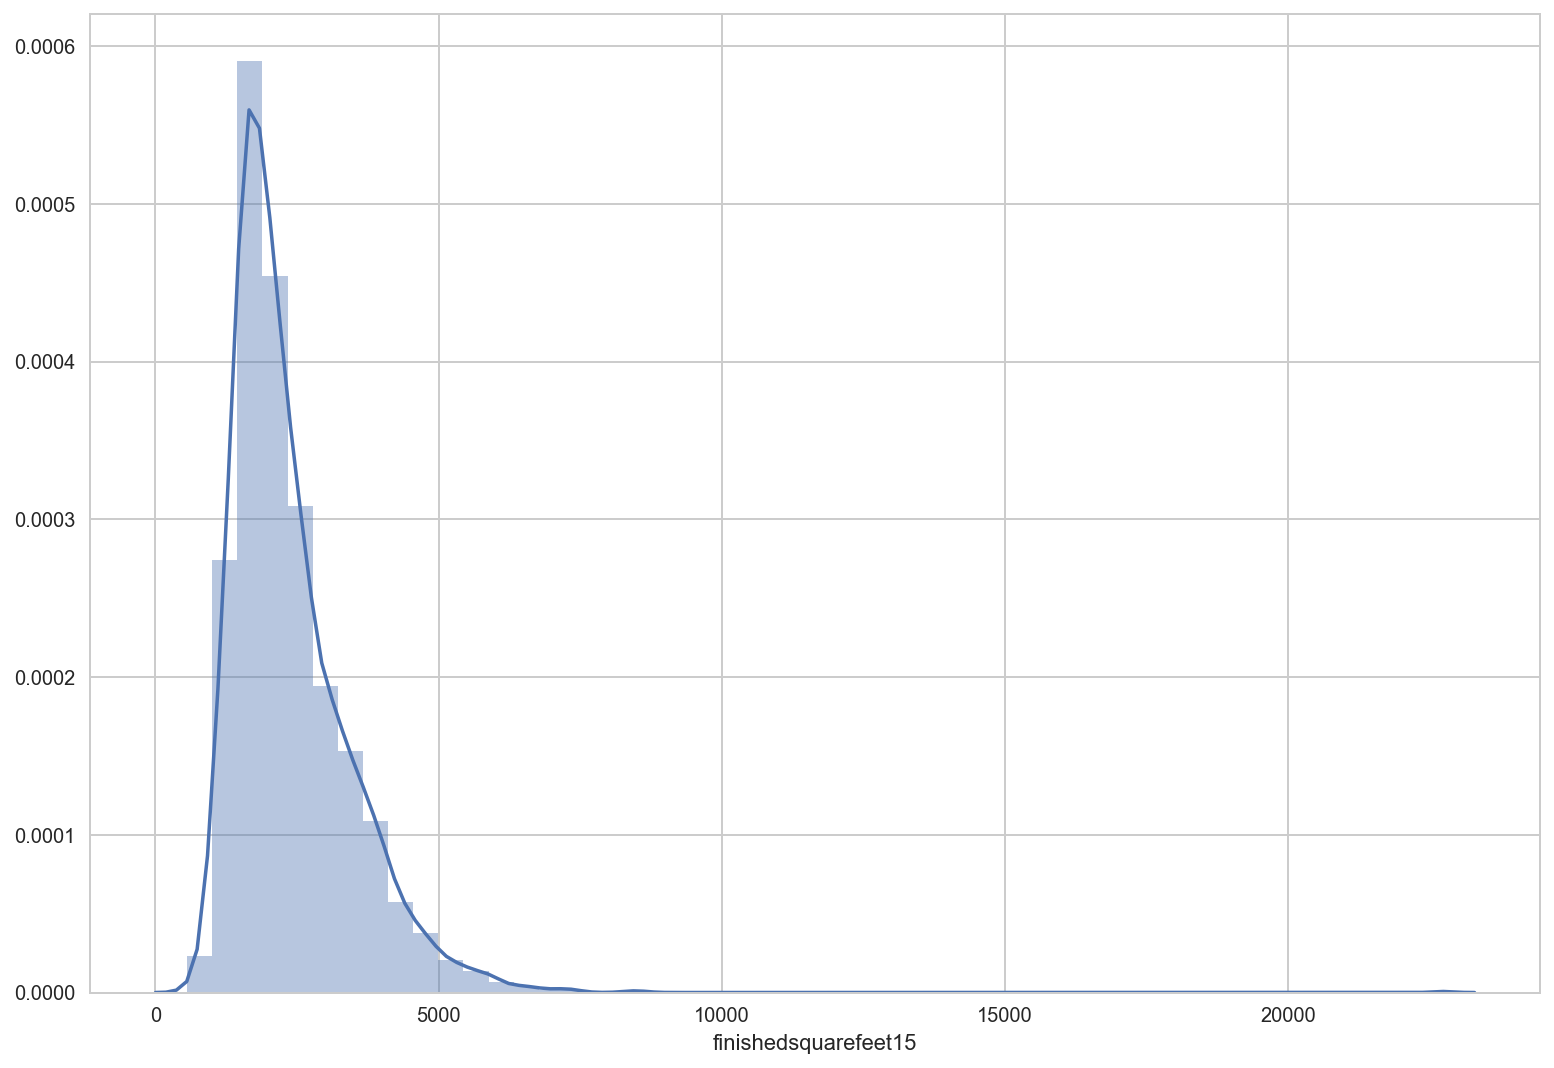

In [116]:
print(data_dict["finishedsquarefeet15"])
sns.distplot(df_16.finishedsquarefeet15.dropna())

In [117]:
df_16.finishedsquarefeet15.fillna(df_16.finishedsquarefeet15.mean(), inplace=True)
numecols.append("finishedsquarefeet15") ## will be scaled 

#### finishedsquarefeet50

,Size of the finished living area on the first (entry) floor of the home


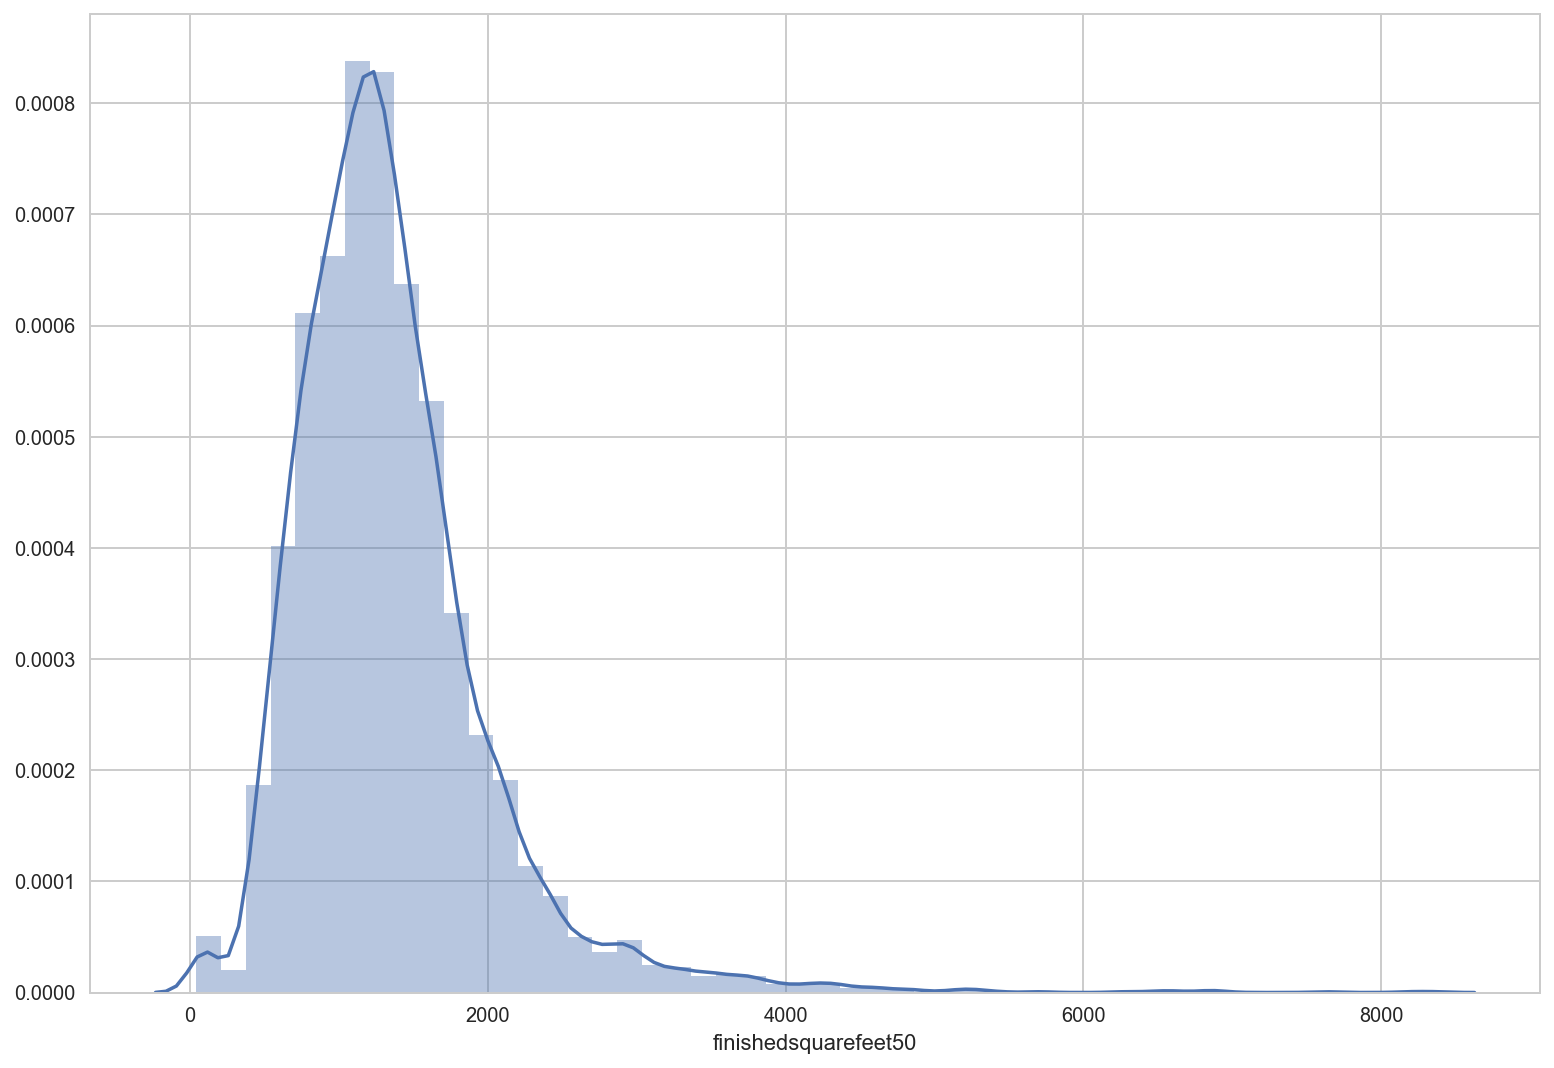

In [122]:
print(data_dict["finishedsquarefeet50"])
sns.distplot(df_16.finishedsquarefeet50.dropna())

In [123]:
df_16.finishedsquarefeet50.fillna(df_16.finishedsquarefeet50.mean(), inplace=True)
numecols.append("finishedsquarefeet50") ## will be scaled 

#### finishedsquarefeet6	

,Base unfinished and finished area


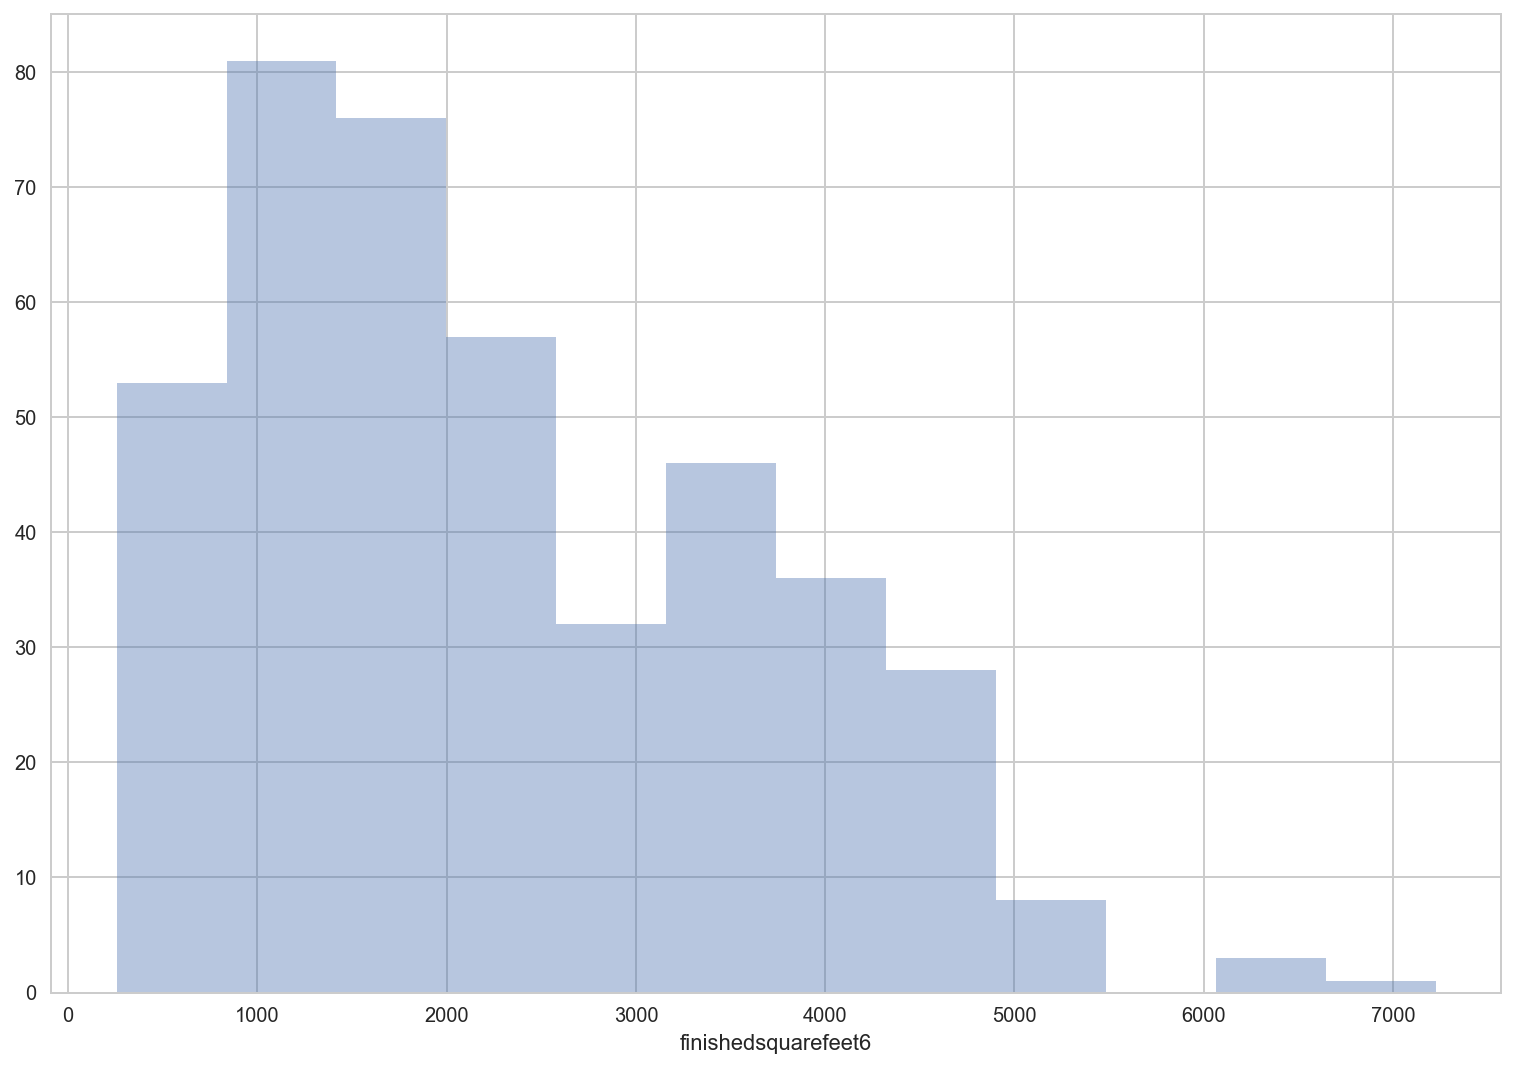

In [125]:
print(data_dict["finishedsquarefeet6"])
sns.distplot(df_16.finishedsquarefeet6.dropna(), kde=False)

In [131]:
df_16.finishedsquarefeet6.fillna(df_16.finishedsquarefeet6.mean(), inplace=True)
numecols.append("finishedsquarefeet6") ## will be scaled 

#### fips 

In [154]:
data_dict["fips"]

',Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details'

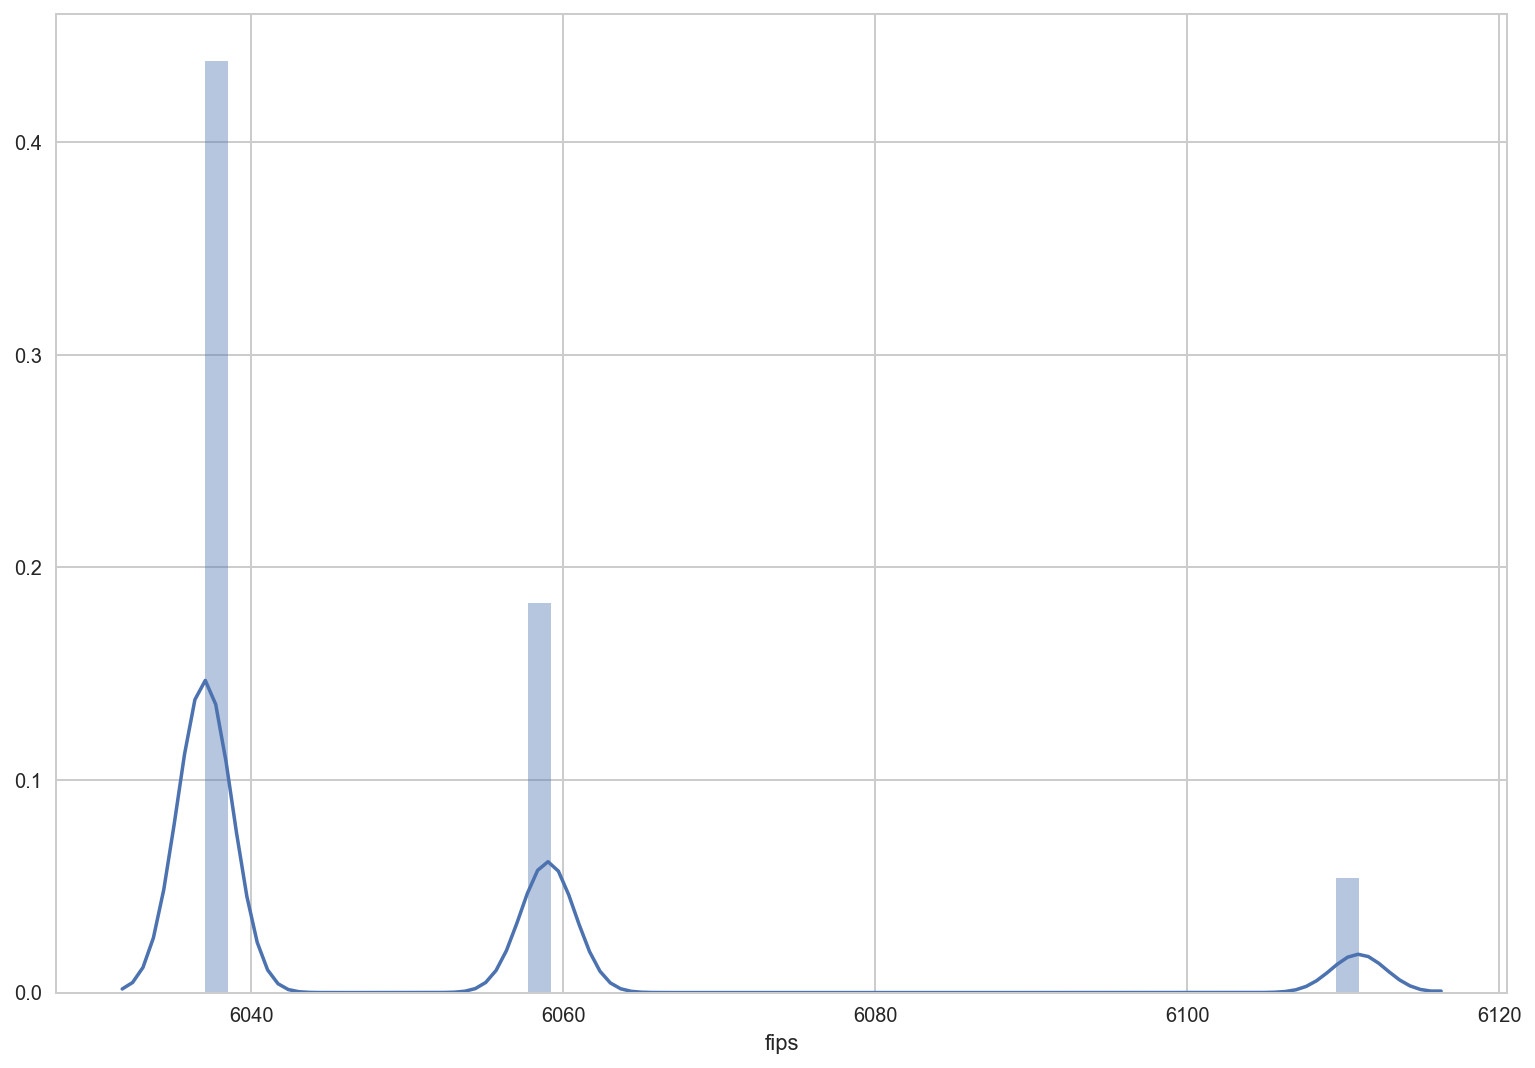

In [141]:
sns.distplot(df_16.fips, kde=False)
len(np.unique(df_16.fips))
# as category 
catecols.append("fips")

#### fireplacecnt

In [153]:
data_dict["fireplacecnt"]

',Number of fireplaces in a home (if any)'

In [147]:
print(np.unique(df_16.fireplacecnt.dropna()))
df_16.fireplacecnt.fillna(0, inplace=True)
# as integer
numecols.append('fireplacecnt')

[1. 2. 3. 4. 5.]


#### fullbathcnt

In [157]:
print(data_dict["fullbathcnt"])
print(np.unique(df_16.fullbathcnt.dropna()))
df_16.fullbathcnt.fillna(0, inplace=True)
numecols.append('fullbathcnt')

,Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 15. 20.]


#### garagecarcnt

,Total number of garages on the lot including an attached garage
(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 13.,
       14., 24.]), array([  290,  6679, 21942,   663,   262,    54,    16,    11,     7,
           6,     2,     2,     1,     1,     1]))


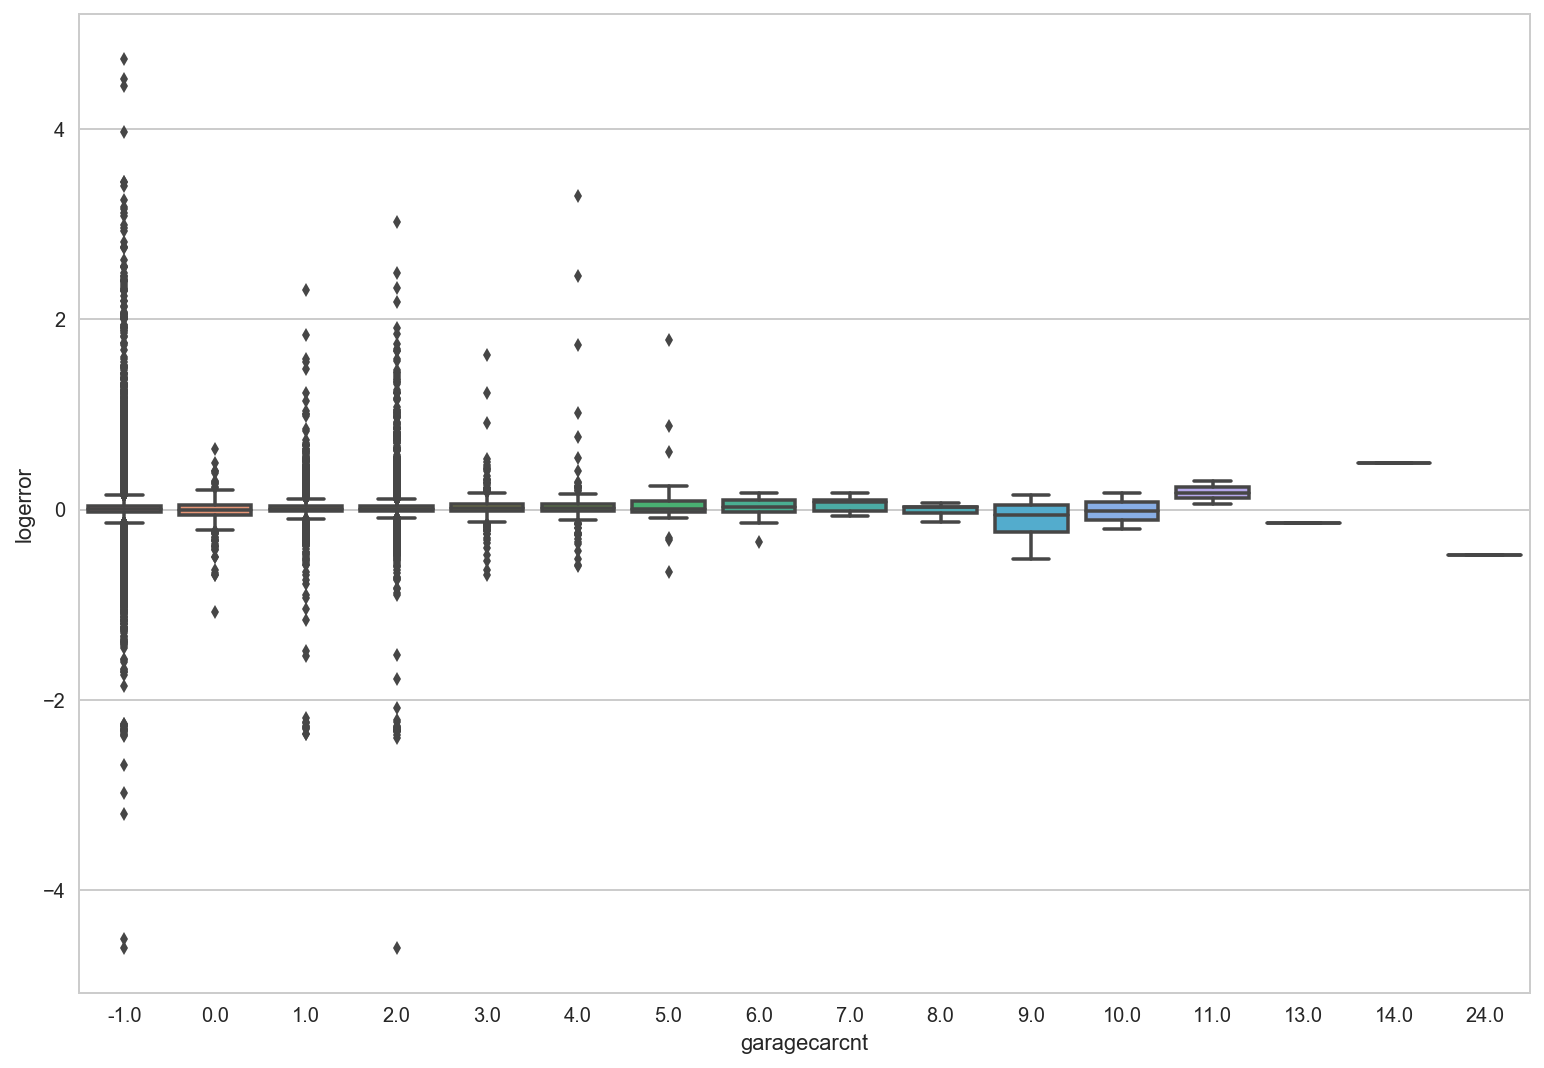

In [164]:
print(data_dict["garagecarcnt"])
print(np.unique(df_16.garagecarcnt.dropna(), return_counts=True))
sns.boxplot(df_16.garagecarcnt.fillna(-1), df_16.logerror)
### 이건 missing value를 0으로 채울 수 없어서 바로 categorical로 만들기로 했다. 
##  데이터 개수를 기준으로 2 이하는 -> 0, 2 초과 는 -> 1 (nan값은 0으로 imputation)

df_16.garagecarcnt = np.array([0 if x <= 2 else 1 for x in df_16.garagecarcnt.fillna(-1)])
catecols.append("garagecarcnt")

#### garagetotalsqft

,Total number of square feet of all garages on lot including an attached garage


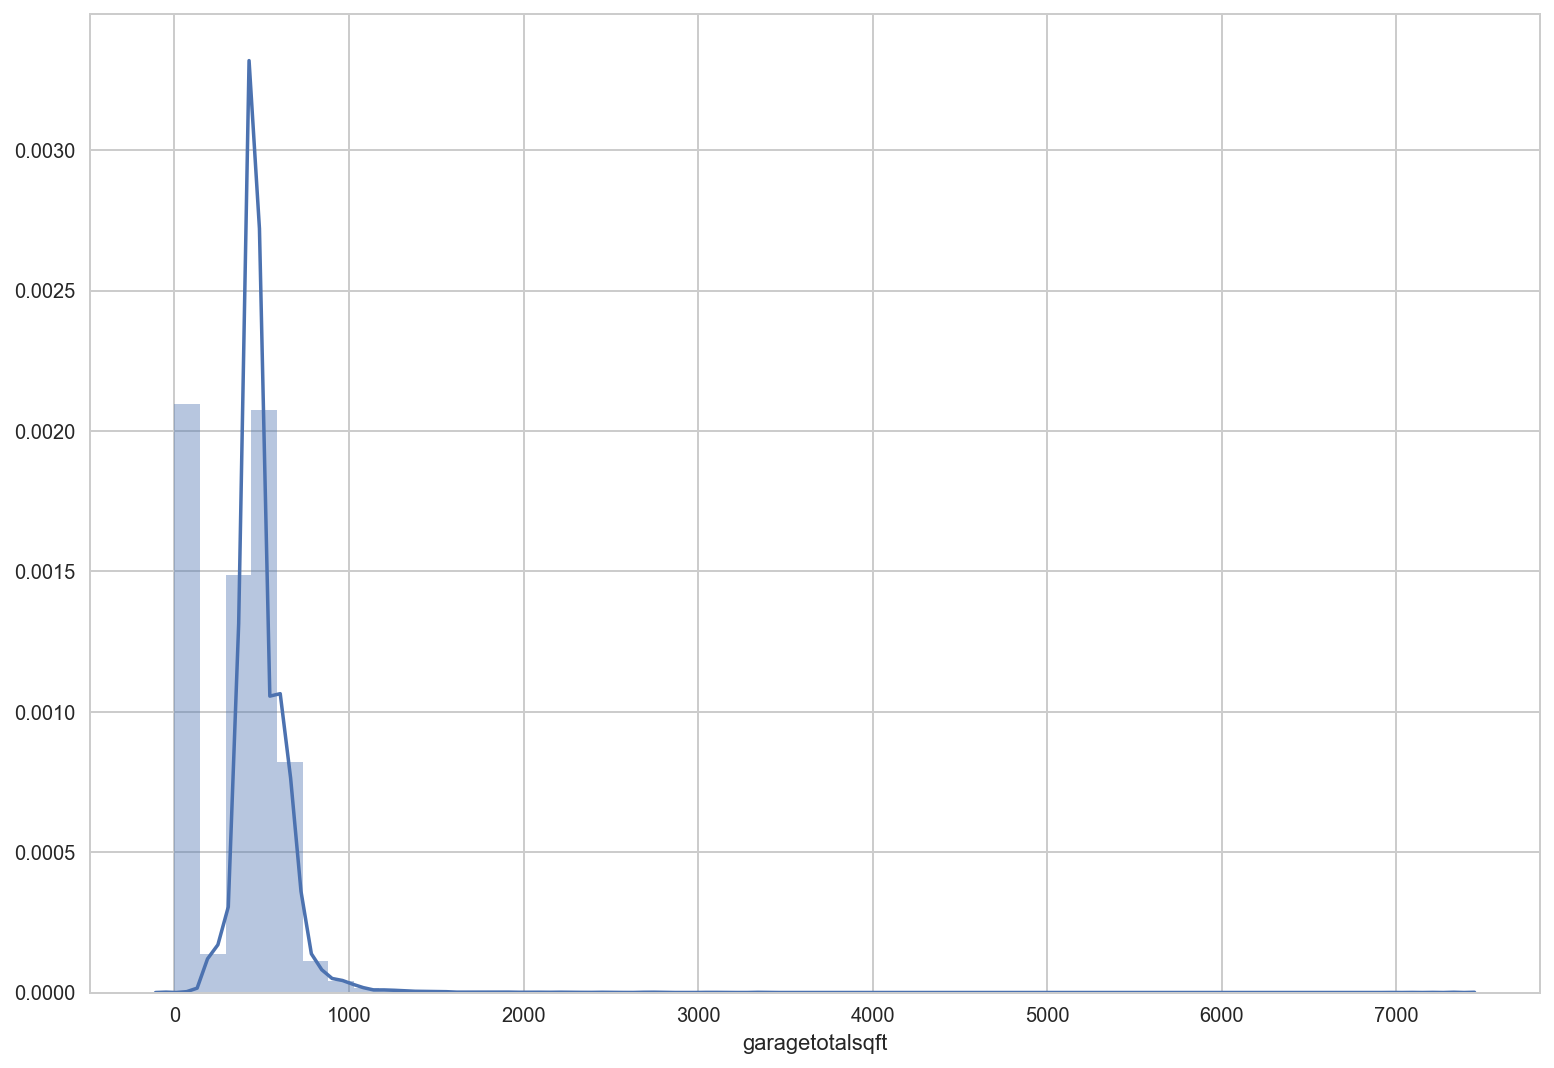

In [171]:
print(data_dict["garagetotalsqft"])
sns.distplot(df_16.garagetotalsqft.dropna())

## mean으로 impuatation 
df_16.garagetotalsqft.fillna(df_16.garagetotalsqft.mean(), inplace=True)
# numerical 
numecols.append("garagetotalsqft") # will be scaled 

#### heatingorsystemtypeid

In [175]:
# categorical
np.unique(df_16.heatingorsystemtypeid.dropna())

df_16.heatingorsystemtypeid.fillna(0, inplace=True)

catecols.append("heatingorsystemtypeid")

#### latitude & longitude   -> 처리 보류! 

,Latitude of the middle of the parcel multiplied by 10e6


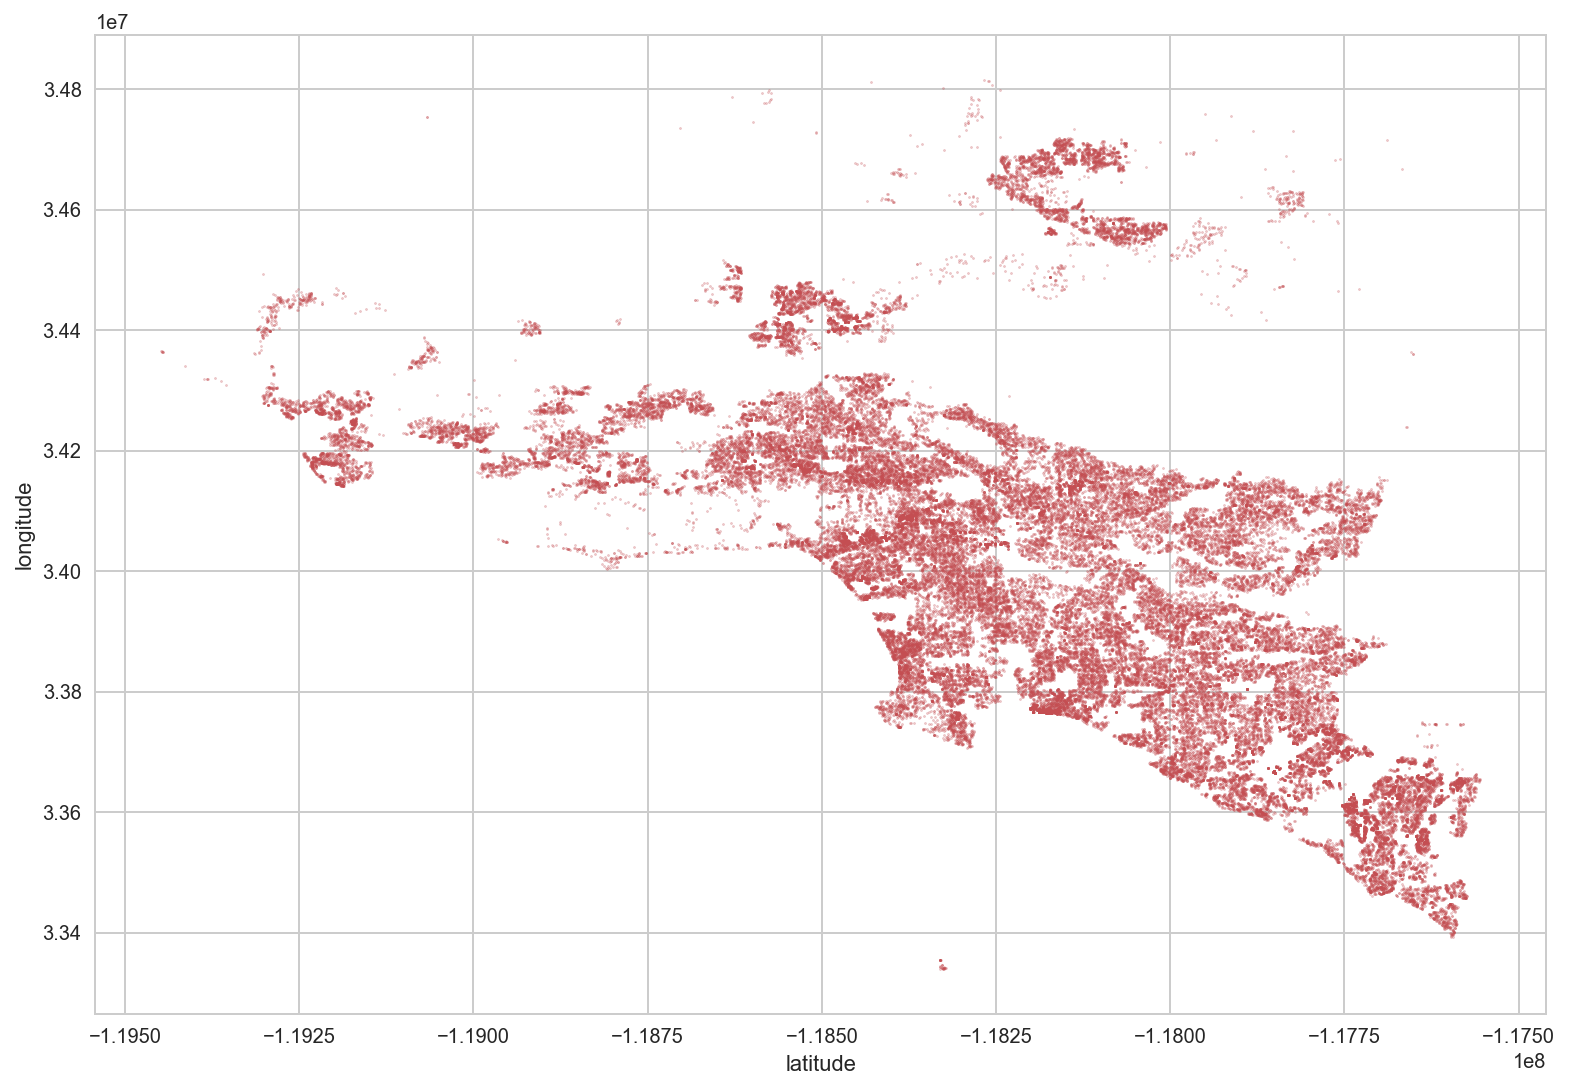

In [247]:
# 위도 경도를 그대로 쓸 수 는 없다. 
print(data_dict["latitude"])
plt.scatter(df_16.longitude, df_16.latitude, c ="r", alpha=0.3, s=1)
plt.xlabel('latitude')
plt.ylabel("longitude")
plt.show()

In [186]:
np.array([df_16.latitude.loc[7], df_16.longitude.loc[7]]) * 10e-7

array([  34.229816, -119.050224])

In [189]:
np.array([df_16.latitude.loc[100], df_16.longitude.loc[100]]) * 10e-7

array([  33.870986, -118.38814 ])

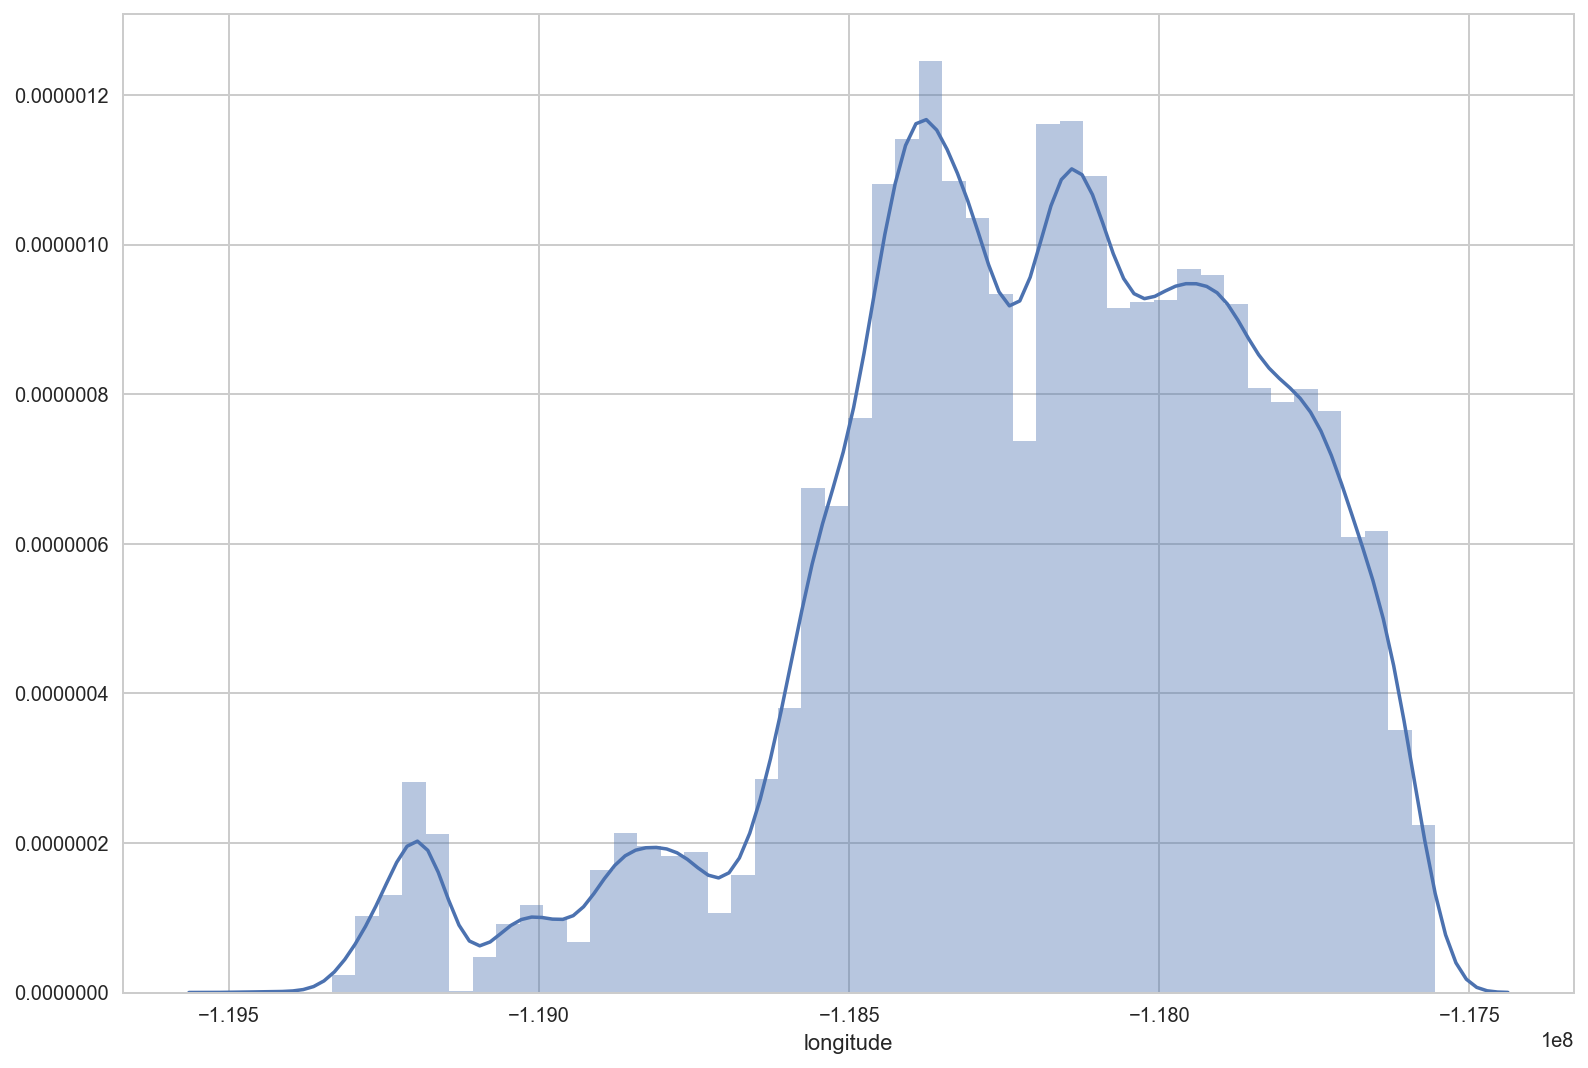

In [191]:
sns.distplot(df_16.longitude)

#### lotsizesquarefeet	

,Area of the lot in square feet
6971010.0 167.0


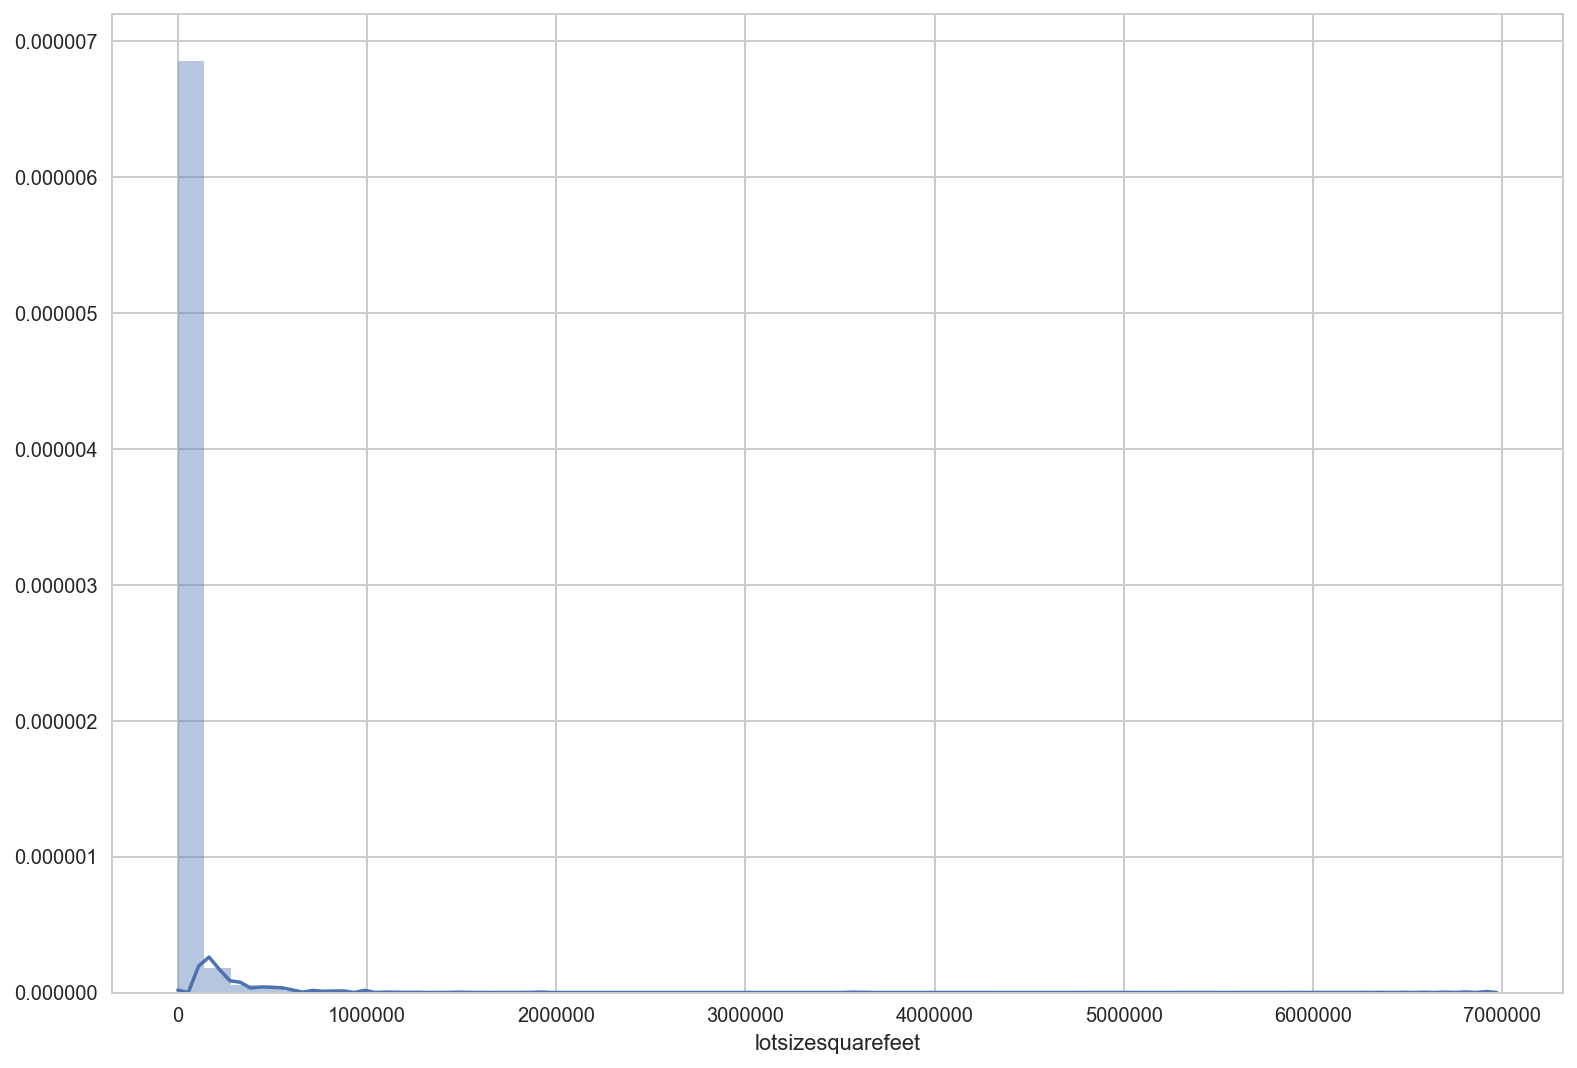

In [201]:
print(data_dict["lotsizesquarefeet"])
sns.distplot(df_16.lotsizesquarefeet.dropna())
print(df_16.lotsizesquarefeet.max(),df_16.lotsizesquarefeet.min())  ## min max 차이가 크다.  
#df_16.lotsizesquarefeet.mode()이값으로 imputation 

df_16.lotsizesquarefeet.fillna(df_16.lotsizesquarefeet.mode(), inplace=True)
numecols.append("lotsizesquarefeet")

#### poolcnt

In [231]:
data_dict["poolcnt"]

',Number of pools on the lot (if any)'

In [228]:
# np.unique(df_16.poolcnt.dropna())

# -> poolcnt 0, 1
df_16.poolcnt.fillna(0, inplace=True)
numecols.append("poolcnt")

#### poolsizesum

In [235]:
print(data_dict["poolsizesum"])
len(df_16.poolsizesum.dropna())

,Total square footage of all pools on property


969

In [239]:
i, x = np.unique(df_16.propertyzoningdesc.dropna() ,return_counts=True)
df_16.pro

58313

'LAOS'

In [241]:
len(i)

1996

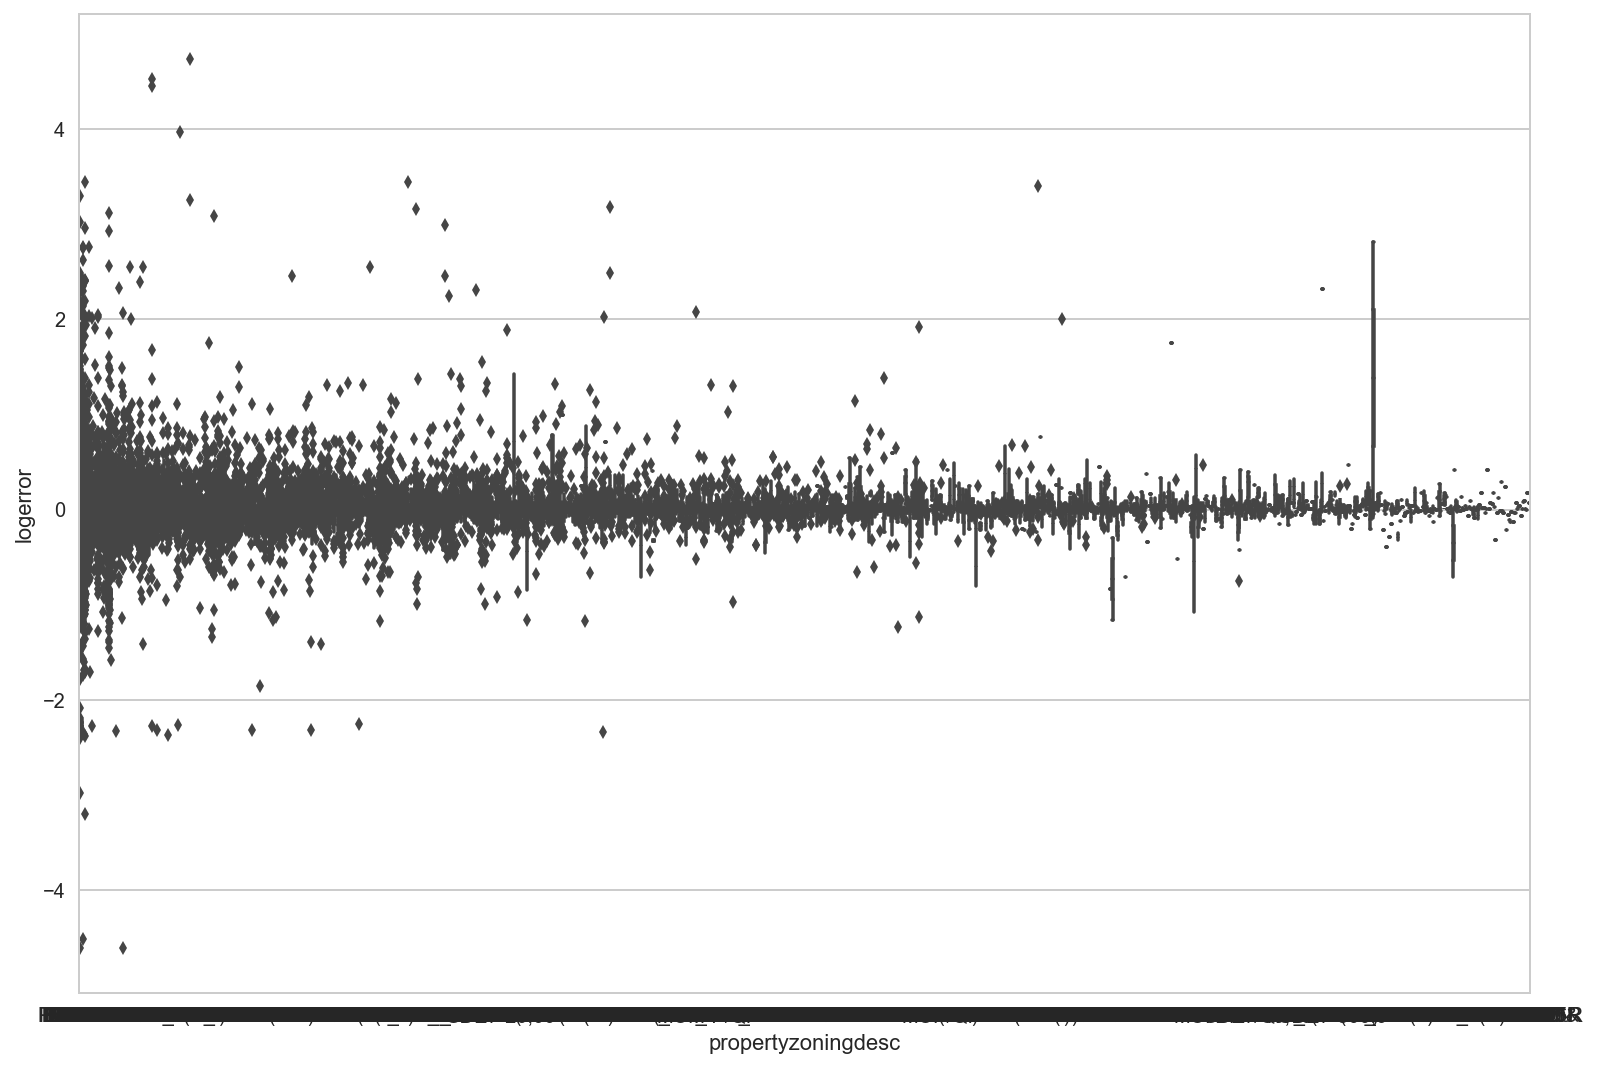

In [240]:
sns.boxplot(x=df_16.propertyzoningdesc.fillna("nana"), y=df_16.logerror)

In [194]:
df_16[df_16.columns[26:]].describe()

,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000
mean,2.911016e+04,1.0,519.827657,1.0,1.0,1.0,261.832179,6.049179e+07,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7.0,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457
std,1.217213e+05,0.0,155.054210,0.0,0.0,0.0,5.182901,2.050549e+05,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0.0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079
min,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000
25%,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300
50%,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037620e+07,25218.000000,3101.000000,118887.000000,96393.000000,0.000000,7.0,1.000000,6.000000,1.000000,259.500000,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13,0.006000
75%,1.168600e+04,1.0,600.000000,1.0,1.0,1.0,266.000000,6.059042e+07,45457.000000,3101.000000,274800.000000,96987.000000,0.000000,7.0,1.000000,6.000000,1.000000,384.000000,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13,0.039200
max,6.971010e+06,1.0,1750.000000,1.0,1.0,1.0,275.000000,6.111009e+07,396556.000000,3101.000000,764167.000000,399675.000000,18.000000,7.0,4.000000,13.000000,143.000000,2678.000000,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13,4.737000


In [ ]:
# categorical 로 도 시도 해 볼 컬럼들 
["bathroomcnt", "bedroomcnt", "calculatedbathnbr", "fireplacecnt", "fullbathcnt"]